# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 18:44:18.189017: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T18:44:21.661590
2025-04-14 18:44:21.661590


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 18:44:15"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

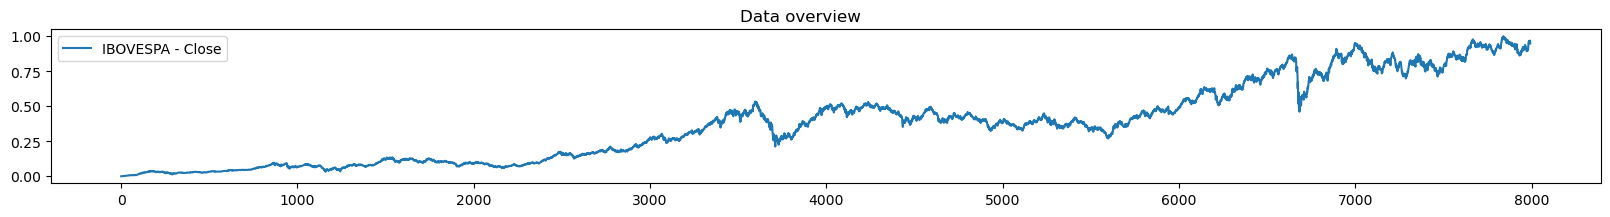

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

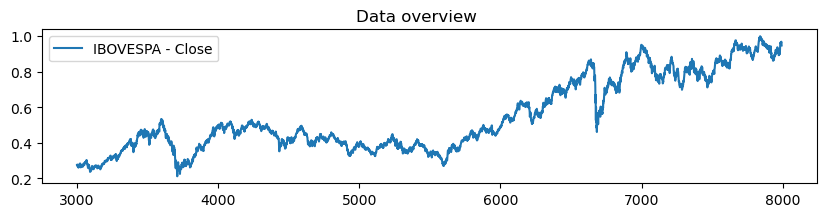

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

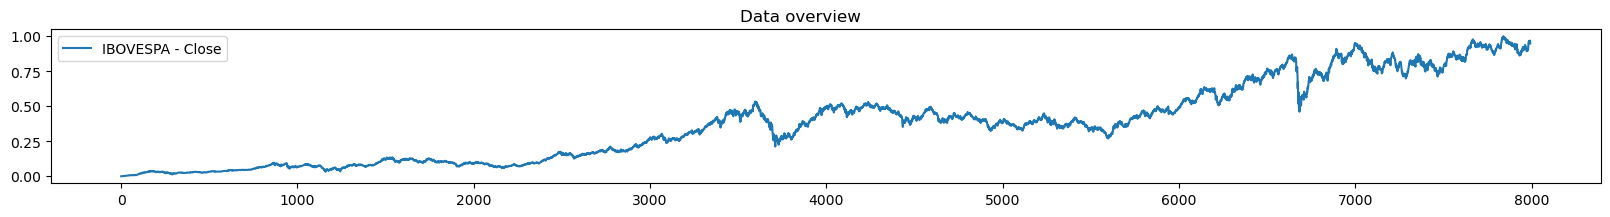

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

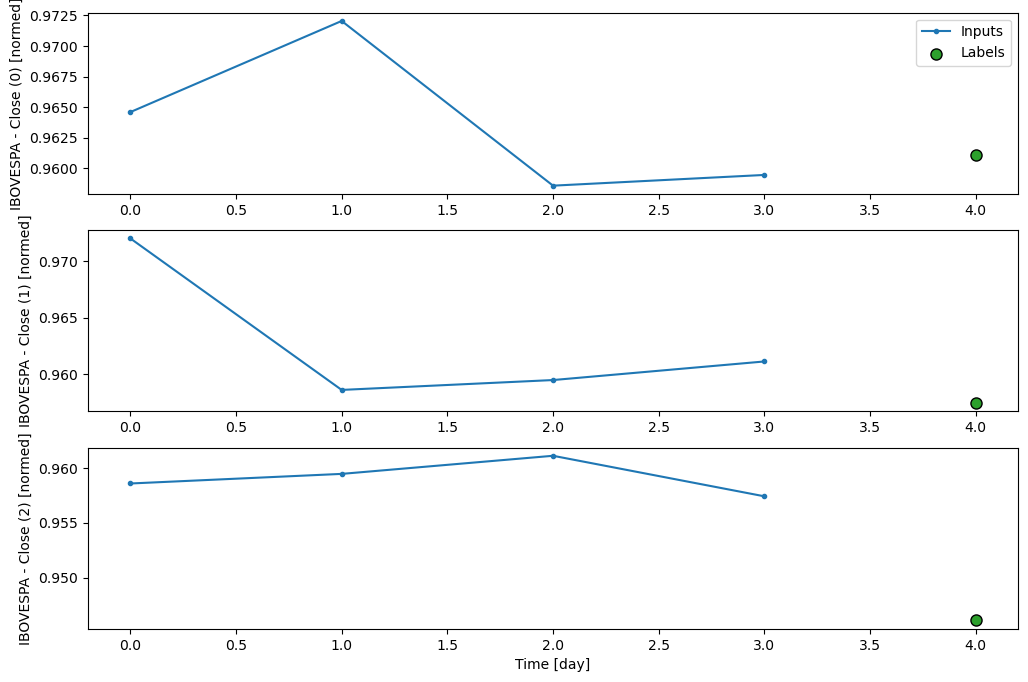

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

1

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11:58 3s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 60.2309 - mean_squared_error: 1.2040e-04 - root_mean_squared_error: 0.0097   

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 53.4161 - mean_squared_error: 1.4682e-04 - root_mean_squared_error: 0.0114

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 46.6222 - mean_squared_error: 1.4350e-04 - root_mean_squared_error: 0.0115

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.9426 - mean_squared_error: 1.5608e-04 - root_mean_squared_error: 0.0121

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.5736 - mean_squared_error: 2.1583e-04 - root_mean_squared_error: 0.0139

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 39.1745 - mean_squared_error: 2.9201e-04 - root_mean_squared_error: 0.0159

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 37.8118 - mean_squared_error: 3.3907e-04 - root_mean_squared_error: 0.0172

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 36.7560 - mean_squared_error: 3.8476e-04 - root_mean_squared_error: 0.0183

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 35.7589 - mean_squared_error: 4.3822e-04 - root_mean_squared_error: 0.0196

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 34.9512 - mean_squared_error: 4.7614e-04 - root_mean_squared_error: 0.0205

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 34.1211 - mean_squared_error: 5.3252e-04 - root_mean_squared_error: 0.0216

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 33.3532 - mean_squared_error: 6.0726e-04 - root_mean_squared_error: 0.0230

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 32.7280 - mean_squared_error: 7.7387e-04 - root_mean_squared_error: 0.0252

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 32.2175 - mean_squared_error: 9.4607e-04 - root_mean_squared_error: 0.0274

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 31.8880 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287    

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 31.3469 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 30.8725 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 30.4218 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 29.9493 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 29.5055 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 29.0796 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 28.6300 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 28.2494 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 27.8756 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 27.7281 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416 - val_loss: 0.0835 - val_mean_absolute_error: 0.0835 - val_mean_absolute_percentage_error: 8.8928 - val_mean_squared_error: 0.0081 - val_root_mean_squared_error: 0.0900


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6678 - mean_absolute_error: 0.6678 - mean_absolute_percentage_error: 31330.6211 - mean_squared_error: 0.4459 - root_mean_squared_error: 0.6678

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6449 - mean_absolute_error: 0.6449 - mean_absolute_percentage_error: 12310.8926 - mean_squared_error: 0.4175 - root_mean_squared_error: 0.6457 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5827 - mean_absolute_error: 0.5827 - mean_absolute_percentage_error: 8585.3066 - mean_squared_error: 0.3563 - root_mean_squared_error: 0.5936 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5065 - mean_absolute_error: 0.5065 - mean_absolute_percentage_error: 6730.2822 - mean_squared_error: 0.3006 - root_mean_squared_error: 0.5401

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4407 - mean_absolute_error: 0.4407 - mean_absolute_percentage_error: 5499.9019 - mean_squared_error: 0.2562 - root_mean_squared_error: 0.4934

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3948 - mean_absolute_error: 0.3948 - mean_absolute_percentage_error: 4746.6030 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4599

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3552 - mean_absolute_error: 0.3552 - mean_absolute_percentage_error: 4144.4438 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4300

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3289 - mean_absolute_error: 0.3289 - mean_absolute_percentage_error: 3764.7976 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.4096

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 3424.3147 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3901

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 3145.8438 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3732

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 2913.3586 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3585

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 2716.0139 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3454

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 2546.2690 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3339

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 2384.8003 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3227

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2171 - mean_absolute_error: 0.2171 - mean_absolute_percentage_error: 2256.4492 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3135

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 2131.7920 - mean_squared_error: 0.1107 - root_mean_squared_error: 0.3042

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 2030.9429 - mean_squared_error: 0.1059 - root_mean_squared_error: 0.2966

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1929 - mean_absolute_error: 0.1929 - mean_absolute_percentage_error: 1940.0840 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2895

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 1865.6504 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2835

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 1790.0120 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2774

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 1734.2024 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2728

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 1675.8207 - mean_squared_error: 0.0887 - root_mean_squared_error: 0.2679

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 1615.8309 - mean_squared_error: 0.0858 - root_mean_squared_error: 0.2629

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 1560.3873 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2581


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 1513.9532 - mean_squared_error: 0.0808 - root_mean_squared_error: 0.2541 - val_loss: 0.0598 - val_mean_absolute_error: 0.0598 - val_mean_absolute_percentage_error: 6.3667 - val_mean_squared_error: 0.0042 - val_root_mean_squared_error: 0.0651


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.4771 - mean_absolute_error: 0.4771 - mean_absolute_percentage_error: 22382.0156 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4771

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4600 - mean_absolute_error: 0.4600 - mean_absolute_percentage_error: 8399.3271 - mean_squared_error: 0.2123 - root_mean_squared_error: 0.4605  

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4058 - mean_absolute_error: 0.4058 - mean_absolute_percentage_error: 5804.1914 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.4188

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3552 - mean_absolute_error: 0.3552 - mean_absolute_percentage_error: 4618.7573 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3822

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 3871.8804 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3530

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 3352.9014 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3295

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 2968.3655 - mean_squared_error: 0.1047 - root_mean_squared_error: 0.3103

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 2644.5435 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2927

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 2411.3796 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2791

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 2202.3838 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2662

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 2044.3690 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2560

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 1909.5790 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2469

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 1793.1122 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2388

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 1691.3555 - mean_squared_error: 0.0631 - root_mean_squared_error: 0.2315

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 1601.5889 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2248

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 1514.2382 - mean_squared_error: 0.0570 - root_mean_squared_error: 0.2181

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 1443.4568 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2126

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 1373.5563 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2069

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 1316.1713 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2022

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 1258.8396 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.1974

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 1211.2811 - mean_squared_error: 0.0463 - root_mean_squared_error: 0.1933

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 1167.5188 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.1895

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 1127.1038 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1859

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 1089.6534 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1826


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 1086.0642 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.1823 - val_loss: 0.0464 - val_mean_absolute_error: 0.0464 - val_mean_absolute_percentage_error: 4.9696 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0484


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 2810.4175 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0598

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 1056.5199 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 667.9062 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 517.7993 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 421.1339 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 362.5548 - mean_squared_error: 8.9364e-04 - root_mean_squared_error: 0.0286

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 331.2951 - mean_squared_error: 8.3098e-04 - root_mean_squared_error: 0.0274

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 308.9387 - mean_squared_error: 7.8464e-04 - root_mean_squared_error: 0.0266

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 286.8079 - mean_squared_error: 7.3763e-04 - root_mean_squared_error: 0.0257

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 278.3847 - mean_squared_error: 7.1945e-04 - root_mean_squared_error: 0.0253

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 265.5153 - mean_squared_error: 6.9134e-04 - root_mean_squared_error: 0.0248

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 245.4093 - mean_squared_error: 6.4657e-04 - root_mean_squared_error: 0.0239

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 226.6955 - mean_squared_error: 6.0403e-04 - root_mean_squared_error: 0.0230

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 210.9012 - mean_squared_error: 5.6766e-04 - root_mean_squared_error: 0.0222

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 197.3750 - mean_squared_error: 5.3665e-04 - root_mean_squared_error: 0.0215

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 185.6580 - mean_squared_error: 5.1088e-04 - root_mean_squared_error: 0.0209

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 174.4388 - mean_squared_error: 4.8722e-04 - root_mean_squared_error: 0.0204

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 165.4751 - mean_squared_error: 4.6890e-04 - root_mean_squared_error: 0.0200

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 157.4778 - mean_squared_error: 4.5236e-04 - root_mean_squared_error: 0.0197

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 149.6162 - mean_squared_error: 4.3589e-04 - root_mean_squared_error: 0.0193

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 143.1906 - mean_squared_error: 4.2242e-04 - root_mean_squared_error: 0.0190

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 137.3532 - mean_squared_error: 4.1050e-04 - root_mean_squared_error: 0.0188

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 132.0236 - mean_squared_error: 4.0016e-04 - root_mean_squared_error: 0.0185

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 127.1361 - mean_squared_error: 3.9155e-04 - root_mean_squared_error: 0.0184

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 123.0710 - mean_squared_error: 3.8559e-04 - root_mean_squared_error: 0.0182

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 118.4796 - mean_squared_error: 3.7989e-04 - root_mean_squared_error: 0.0182


Epoch: 4 - LR: 0.009045630693435669


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 115.3741 - mean_squared_error: 3.7670e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0275 - val_mean_absolute_error: 0.0275 - val_mean_absolute_percentage_error: 2.9301 - val_mean_squared_error: 9.2353e-04 - val_root_mean_squared_error: 0.0304


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 4137.4336 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 1522.9963 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 1010.3727 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 794.7961 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 651.5950 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0509

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 571.1247 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0479

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 504.2410 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 457.3887 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 415.5271 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 381.3939 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 355.6101 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 333.4512 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 312.1858 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 293.7690 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 277.6414 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 263.3684 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 249.4342 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 237.0405 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 226.8984 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 217.6715 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 209.2371 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 201.4944 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 196.4409 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 190.9978 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 184.6452 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 182.8307 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9290 - val_mean_squared_error: 1.1533e-04 - val_root_mean_squared_error: 0.0107


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 2119.8953 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 748.8713 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 495.1305 - mean_squared_error: 7.2204e-04 - root_mean_squared_error: 0.0257

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 388.6915 - mean_squared_error: 5.8276e-04 - root_mean_squared_error: 0.0228

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 317.7272 - mean_squared_error: 4.8721e-04 - root_mean_squared_error: 0.0206

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 271.0129 - mean_squared_error: 4.2439e-04 - root_mean_squared_error: 0.0191

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 237.4814 - mean_squared_error: 3.7845e-04 - root_mean_squared_error: 0.0180

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 214.3701 - mean_squared_error: 3.4617e-04 - root_mean_squared_error: 0.0171

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 193.9883 - mean_squared_error: 3.1733e-04 - root_mean_squared_error: 0.0163

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 177.5364 - mean_squared_error: 2.9420e-04 - root_mean_squared_error: 0.0157

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 163.9300 - mean_squared_error: 2.7505e-04 - root_mean_squared_error: 0.0151

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 151.4113 - mean_squared_error: 2.5749e-04 - root_mean_squared_error: 0.0146

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 141.7442 - mean_squared_error: 2.4444e-04 - root_mean_squared_error: 0.0142

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 133.3628 - mean_squared_error: 2.3359e-04 - root_mean_squared_error: 0.0139

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 126.0169 - mean_squared_error: 2.2450e-04 - root_mean_squared_error: 0.0137

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 118.9115 - mean_squared_error: 2.1597e-04 - root_mean_squared_error: 0.0134

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 113.1823 - mean_squared_error: 2.0905e-04 - root_mean_squared_error: 0.0132

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 108.0348 - mean_squared_error: 2.0276e-04 - root_mean_squared_error: 0.0130

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 103.3830 - mean_squared_error: 1.9706e-04 - root_mean_squared_error: 0.0129

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 98.7552 - mean_squared_error: 1.9148e-04 - root_mean_squared_error: 0.0127 

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 94.5652 - mean_squared_error: 1.8653e-04 - root_mean_squared_error: 0.0126

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 91.0851 - mean_squared_error: 1.8298e-04 - root_mean_squared_error: 0.0125

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 87.8800 - mean_squared_error: 1.8057e-04 - root_mean_squared_error: 0.0124

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 84.9165 - mean_squared_error: 1.7870e-04 - root_mean_squared_error: 0.0124


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 83.2434 - mean_squared_error: 1.7774e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2865 - val_mean_squared_error: 2.1602e-04 - val_root_mean_squared_error: 0.0147


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 3855.8867 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0821

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 1502.8623 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 987.1130 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0547 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 757.2545 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0486

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 622.3900 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 532.0947 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 461.2497 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 412.8489 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 378.0608 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 349.2496 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 332.6060 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 310.7000 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 291.7719 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 273.5312 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 257.6526 - mean_squared_error: 9.8572e-04 - root_mean_squared_error: 0.0285

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 242.3841 - mean_squared_error: 9.3367e-04 - root_mean_squared_error: 0.0276

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 230.1420 - mean_squared_error: 8.9193e-04 - root_mean_squared_error: 0.0269

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 219.1920 - mean_squared_error: 8.5434e-04 - root_mean_squared_error: 0.0263

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 210.2763 - mean_squared_error: 8.2362e-04 - root_mean_squared_error: 0.0258

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 201.2646 - mean_squared_error: 7.9245e-04 - root_mean_squared_error: 0.0252

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 193.0672 - mean_squared_error: 7.6411e-04 - root_mean_squared_error: 0.0247

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 185.5751 - mean_squared_error: 7.3841e-04 - root_mean_squared_error: 0.0243

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 178.6997 - mean_squared_error: 7.1563e-04 - root_mean_squared_error: 0.0239

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 172.3688 - mean_squared_error: 6.9706e-04 - root_mean_squared_error: 0.0236

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 166.5193 - mean_squared_error: 6.8278e-04 - root_mean_squared_error: 0.0234


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 163.2172 - mean_squared_error: 6.7500e-04 - root_mean_squared_error: 0.0233 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 0.9973 - val_mean_squared_error: 1.3439e-04 - val_root_mean_squared_error: 0.0116


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 2716.5339 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0578

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 982.2867 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 653.0300 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 502.5362 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 413.3615 - mean_squared_error: 8.7729e-04 - root_mean_squared_error: 0.0277

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 353.5787 - mean_squared_error: 7.6124e-04 - root_mean_squared_error: 0.0256

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 310.3051 - mean_squared_error: 6.7525e-04 - root_mean_squared_error: 0.0239

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 277.3604 - mean_squared_error: 6.0856e-04 - root_mean_squared_error: 0.0226

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 251.3443 - mean_squared_error: 5.5516e-04 - root_mean_squared_error: 0.0214

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 230.2233 - mean_squared_error: 5.1146e-04 - root_mean_squared_error: 0.0204

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 212.6957 - mean_squared_error: 4.7508e-04 - root_mean_squared_error: 0.0196

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 197.8942 - mean_squared_error: 4.4472e-04 - root_mean_squared_error: 0.0189

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 184.0503 - mean_squared_error: 4.1798e-04 - root_mean_squared_error: 0.0183

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 173.2198 - mean_squared_error: 3.9946e-04 - root_mean_squared_error: 0.0179

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 163.7167 - mean_squared_error: 3.8365e-04 - root_mean_squared_error: 0.0176

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 155.3024 - mean_squared_error: 3.6964e-04 - root_mean_squared_error: 0.0173

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 147.7924 - mean_squared_error: 3.5692e-04 - root_mean_squared_error: 0.0170

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 141.0441 - mean_squared_error: 3.4530e-04 - root_mean_squared_error: 0.0167

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 134.9443 - mean_squared_error: 3.3465e-04 - root_mean_squared_error: 0.0165

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 129.4010 - mean_squared_error: 3.2491e-04 - root_mean_squared_error: 0.0163

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 123.8561 - mean_squared_error: 3.1515e-04 - root_mean_squared_error: 0.0160

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 119.2524 - mean_squared_error: 3.0755e-04 - root_mean_squared_error: 0.0159

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 115.0141 - mean_squared_error: 3.0162e-04 - root_mean_squared_error: 0.0158

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 111.8570 - mean_squared_error: 2.9775e-04 - root_mean_squared_error: 0.0157


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 108.8866 - mean_squared_error: 2.9420e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8433 - val_mean_squared_error: 9.5093e-05 - val_root_mean_squared_error: 0.0098


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 3511.4182 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0748

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 1299.7832 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 856.0375 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0504 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 670.4598 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0454

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 557.2473 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 479.8338 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 423.0960 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 379.5248 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 344.8921 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 314.0742 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 290.9128 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 269.4415 - mean_squared_error: 9.9448e-04 - root_mean_squared_error: 0.0289

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 252.7614 - mean_squared_error: 9.3904e-04 - root_mean_squared_error: 0.0280

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 239.5938 - mean_squared_error: 8.9550e-04 - root_mean_squared_error: 0.0273

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 225.4255 - mean_squared_error: 8.4856e-04 - root_mean_squared_error: 0.0265

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 214.0623 - mean_squared_error: 8.1083e-04 - root_mean_squared_error: 0.0258

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 204.8646 - mean_squared_error: 7.8005e-04 - root_mean_squared_error: 0.0253

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 195.6181 - mean_squared_error: 7.4899e-04 - root_mean_squared_error: 0.0247

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 187.2495 - mean_squared_error: 7.2075e-04 - root_mean_squared_error: 0.0242

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 179.6352 - mean_squared_error: 6.9499e-04 - root_mean_squared_error: 0.0237

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 172.6743 - mean_squared_error: 6.7145e-04 - root_mean_squared_error: 0.0233

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 166.2856 - mean_squared_error: 6.5054e-04 - root_mean_squared_error: 0.0229

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 160.4021 - mean_squared_error: 6.3311e-04 - root_mean_squared_error: 0.0226

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 154.9640 - mean_squared_error: 6.1863e-04 - root_mean_squared_error: 0.0224


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 151.8939 - mean_squared_error: 6.1063e-04 - root_mean_squared_error: 0.0222 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7321 - val_mean_squared_error: 7.1038e-05 - val_root_mean_squared_error: 0.0084


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 2738.6794 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0583

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 1002.9260 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 676.2701 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 522.0165 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 429.9441 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 373.3730 - mean_squared_error: 9.0790e-04 - root_mean_squared_error: 0.0284

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 327.2115 - mean_squared_error: 8.0573e-04 - root_mean_squared_error: 0.0265

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 289.1366 - mean_squared_error: 7.1952e-04 - root_mean_squared_error: 0.0248

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 262.1404 - mean_squared_error: 6.5731e-04 - root_mean_squared_error: 0.0236

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 240.2062 - mean_squared_error: 6.0624e-04 - root_mean_squared_error: 0.0225

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 221.9944 - mean_squared_error: 5.6368e-04 - root_mean_squared_error: 0.0216

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 210.9701 - mean_squared_error: 5.3819e-04 - root_mean_squared_error: 0.0210

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 198.4677 - mean_squared_error: 5.1013e-04 - root_mean_squared_error: 0.0204

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 187.5240 - mean_squared_error: 4.8789e-04 - root_mean_squared_error: 0.0200

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 175.8570 - mean_squared_error: 4.6779e-04 - root_mean_squared_error: 0.0196

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 166.5676 - mean_squared_error: 4.5220e-04 - root_mean_squared_error: 0.0193

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 157.5267 - mean_squared_error: 4.3648e-04 - root_mean_squared_error: 0.0190

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 150.2002 - mean_squared_error: 4.2329e-04 - root_mean_squared_error: 0.0188

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 143.5900 - mean_squared_error: 4.1103e-04 - root_mean_squared_error: 0.0185

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 138.1673 - mean_squared_error: 4.0072e-04 - root_mean_squared_error: 0.0183

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 132.6482 - mean_squared_error: 3.9000e-04 - root_mean_squared_error: 0.0181

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 127.5948 - mean_squared_error: 3.8006e-04 - root_mean_squared_error: 0.0179

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 122.9495 - mean_squared_error: 3.7113e-04 - root_mean_squared_error: 0.0177

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 118.6627 - mean_squared_error: 3.6291e-04 - root_mean_squared_error: 0.0175

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 114.6934 - mean_squared_error: 3.5534e-04 - root_mean_squared_error: 0.0173


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 113.9352 - mean_squared_error: 3.5388e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0600 - val_mean_squared_error: 1.4204e-04 - val_root_mean_squared_error: 0.0119


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 2317.1465 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 1008.7057 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 592.9753 - mean_squared_error: 9.9932e-04 - root_mean_squared_error: 0.0303

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 435.0275 - mean_squared_error: 7.5224e-04 - root_mean_squared_error: 0.0258

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 348.7610 - mean_squared_error: 6.1221e-04 - root_mean_squared_error: 0.0230

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 297.8781 - mean_squared_error: 5.2867e-04 - root_mean_squared_error: 0.0211

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 261.1616 - mean_squared_error: 4.6757e-04 - root_mean_squared_error: 0.0197

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 233.3383 - mean_squared_error: 4.2110e-04 - root_mean_squared_error: 0.0186

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 209.5142 - mean_squared_error: 3.8118e-04 - root_mean_squared_error: 0.0176

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 192.0997 - mean_squared_error: 3.5181e-04 - root_mean_squared_error: 0.0168

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 178.9654 - mean_squared_error: 3.2979e-04 - root_mean_squared_error: 0.0162

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 166.5278 - mean_squared_error: 3.0924e-04 - root_mean_squared_error: 0.0157

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 155.8709 - mean_squared_error: 2.9220e-04 - root_mean_squared_error: 0.0152

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 146.6287 - mean_squared_error: 2.7791e-04 - root_mean_squared_error: 0.0148

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 138.5259 - mean_squared_error: 2.6566e-04 - root_mean_squared_error: 0.0145

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 131.3589 - mean_squared_error: 2.5508e-04 - root_mean_squared_error: 0.0142

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 125.5749 - mean_squared_error: 2.4647e-04 - root_mean_squared_error: 0.0140

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 119.7751 - mean_squared_error: 2.3780e-04 - root_mean_squared_error: 0.0138

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 114.5392 - mean_squared_error: 2.2993e-04 - root_mean_squared_error: 0.0135

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 109.7868 - mean_squared_error: 2.2285e-04 - root_mean_squared_error: 0.0133

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 105.8680 - mean_squared_error: 2.1713e-04 - root_mean_squared_error: 0.0132

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 101.8621 - mean_squared_error: 2.1160e-04 - root_mean_squared_error: 0.0130

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 98.1799 - mean_squared_error: 2.0737e-04 - root_mean_squared_error: 0.0129 

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 94.7820 - mean_squared_error: 2.0408e-04 - root_mean_squared_error: 0.0129


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 91.6356 - mean_squared_error: 2.0129e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7167 - val_mean_squared_error: 6.6239e-05 - val_root_mean_squared_error: 0.0081


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 3353.6802 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0714

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 1312.8879 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 861.3414 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0480 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 660.1722 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 542.0530 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 463.0643 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 406.0469 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 362.7497 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 328.6235 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 306.0596 - mean_squared_error: 9.8745e-04 - root_mean_squared_error: 0.0288

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 291.2750 - mean_squared_error: 9.4339e-04 - root_mean_squared_error: 0.0281

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 282.2712 - mean_squared_error: 9.1648e-04 - root_mean_squared_error: 0.0276

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 271.8529 - mean_squared_error: 8.8532e-04 - root_mean_squared_error: 0.0271

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 256.8511 - mean_squared_error: 8.4048e-04 - root_mean_squared_error: 0.0263

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 240.4969 - mean_squared_error: 7.9190e-04 - root_mean_squared_error: 0.0255

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 226.3012 - mean_squared_error: 7.5029e-04 - root_mean_squared_error: 0.0247

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 213.8458 - mean_squared_error: 7.1396e-04 - root_mean_squared_error: 0.0241

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 205.9933 - mean_squared_error: 6.9113e-04 - root_mean_squared_error: 0.0236

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 197.7644 - mean_squared_error: 6.6709e-04 - root_mean_squared_error: 0.0232

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 190.2307 - mean_squared_error: 6.4494e-04 - root_mean_squared_error: 0.0228

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 183.3055 - mean_squared_error: 6.2450e-04 - root_mean_squared_error: 0.0224

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 177.6876 - mean_squared_error: 6.0786e-04 - root_mean_squared_error: 0.0221

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 171.0016 - mean_squared_error: 5.8814e-04 - root_mean_squared_error: 0.0217

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 165.5089 - mean_squared_error: 5.7202e-04 - root_mean_squared_error: 0.0214

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 159.7777 - mean_squared_error: 5.5537e-04 - root_mean_squared_error: 0.0210

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 155.6144 - mean_squared_error: 5.4351e-04 - root_mean_squared_error: 0.0208

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 151.1410 - mean_squared_error: 5.3114e-04 - root_mean_squared_error: 0.0206

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 146.9426 - mean_squared_error: 5.1967e-04 - root_mean_squared_error: 0.0203

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 142.5166 - mean_squared_error: 5.0769e-04 - root_mean_squared_error: 0.0201


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 141.5737 - mean_squared_error: 5.0513e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8148 - val_mean_squared_error: 9.0348e-05 - val_root_mean_squared_error: 0.0095


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 2964.6362 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0631

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 1093.7775 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0490 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 740.0541 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 573.1782 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 473.0936 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 405.6384 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 360.9040 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 333.0482 - mean_squared_error: 9.5322e-04 - root_mean_squared_error: 0.0289

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 319.1984 - mean_squared_error: 9.1724e-04 - root_mean_squared_error: 0.0282

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 309.6322 - mean_squared_error: 8.9223e-04 - root_mean_squared_error: 0.0278

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 300.6875 - mean_squared_error: 8.6872e-04 - root_mean_squared_error: 0.0274

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 292.3034 - mean_squared_error: 8.4660e-04 - root_mean_squared_error: 0.0270

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 286.9997 - mean_squared_error: 8.3257e-04 - root_mean_squared_error: 0.0267

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 284.4277 - mean_squared_error: 8.2576e-04 - root_mean_squared_error: 0.0266

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 281.9070 - mean_squared_error: 8.1907e-04 - root_mean_squared_error: 0.0265

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 279.4359 - mean_squared_error: 8.1250e-04 - root_mean_squared_error: 0.0263

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 277.0128 - mean_squared_error: 8.0606e-04 - root_mean_squared_error: 0.0262

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 272.3049 - mean_squared_error: 7.9352e-04 - root_mean_squared_error: 0.0260

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 257.1467 - mean_squared_error: 7.5296e-04 - root_mean_squared_error: 0.0252

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 249.2990 - mean_squared_error: 7.3189e-04 - root_mean_squared_error: 0.0248

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 240.2086 - mean_squared_error: 7.0741e-04 - root_mean_squared_error: 0.0243

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 224.0696 - mean_squared_error: 6.6393e-04 - root_mean_squared_error: 0.0235

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 210.1700 - mean_squared_error: 6.2685e-04 - root_mean_squared_error: 0.0227

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 199.1998 - mean_squared_error: 5.9779e-04 - root_mean_squared_error: 0.0222

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 187.3990 - mean_squared_error: 5.6658e-04 - root_mean_squared_error: 0.0215

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 177.9367 - mean_squared_error: 5.4153e-04 - root_mean_squared_error: 0.0210 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 168.6754 - mean_squared_error: 5.1682e-04 - root_mean_squared_error: 0.0205

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 161.1339 - mean_squared_error: 4.9662e-04 - root_mean_squared_error: 0.0200

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 154.3019 - mean_squared_error: 4.7825e-04 - root_mean_squared_error: 0.0196

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 147.4885 - mean_squared_error: 4.5990e-04 - root_mean_squared_error: 0.0192

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 141.8456 - mean_squared_error: 4.4477e-04 - root_mean_squared_error: 0.0189

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 136.6615 - mean_squared_error: 4.3169e-04 - root_mean_squared_error: 0.0186

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 131.8828 - mean_squared_error: 4.2121e-04 - root_mean_squared_error: 0.0184

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 127.0372 - mean_squared_error: 4.1152e-04 - root_mean_squared_error: 0.0182


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 126.1992 - mean_squared_error: 4.0989e-04 - root_mean_squared_error: 0.0182 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7052 - val_mean_squared_error: 6.7387e-05 - val_root_mean_squared_error: 0.0082


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 2251.8042 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 824.2235 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 560.9339 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 428.1740 - mean_squared_error: 9.0184e-04 - root_mean_squared_error: 0.0293

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 350.6812 - mean_squared_error: 7.7229e-04 - root_mean_squared_error: 0.0269

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 299.1667 - mean_squared_error: 6.7803e-04 - root_mean_squared_error: 0.0250

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 265.0603 - mean_squared_error: 6.1224e-04 - root_mean_squared_error: 0.0236

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 238.6356 - mean_squared_error: 5.5932e-04 - root_mean_squared_error: 0.0224

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 217.4846 - mean_squared_error: 5.1580e-04 - root_mean_squared_error: 0.0214

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 203.3484 - mean_squared_error: 4.8620e-04 - root_mean_squared_error: 0.0207

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 191.1248 - mean_squared_error: 4.6049e-04 - root_mean_squared_error: 0.0200

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 180.4406 - mean_squared_error: 4.3820e-04 - root_mean_squared_error: 0.0195

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 168.8257 - mean_squared_error: 4.1465e-04 - root_mean_squared_error: 0.0189

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 158.7783 - mean_squared_error: 3.9612e-04 - root_mean_squared_error: 0.0185

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 149.9897 - mean_squared_error: 3.8166e-04 - root_mean_squared_error: 0.0182

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 142.9579 - mean_squared_error: 3.7007e-04 - root_mean_squared_error: 0.0179

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 135.9561 - mean_squared_error: 3.5818e-04 - root_mean_squared_error: 0.0176

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 130.2745 - mean_squared_error: 3.4823e-04 - root_mean_squared_error: 0.0174

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 124.5492 - mean_squared_error: 3.3795e-04 - root_mean_squared_error: 0.0171

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 119.3560 - mean_squared_error: 3.2839e-04 - root_mean_squared_error: 0.0169

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 114.1702 - mean_squared_error: 3.1865e-04 - root_mean_squared_error: 0.0166

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 109.8702 - mean_squared_error: 3.1049e-04 - root_mean_squared_error: 0.0164

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 105.9152 - mean_squared_error: 3.0326e-04 - root_mean_squared_error: 0.0162

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 102.2633 - mean_squared_error: 2.9666e-04 - root_mean_squared_error: 0.0161

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 98.8800 - mean_squared_error: 2.9061e-04 - root_mean_squared_error: 0.0159 


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 98.2336 - mean_squared_error: 2.8945e-04 - root_mean_squared_error: 0.0159 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.3558 - val_mean_squared_error: 2.0880e-04 - val_root_mean_squared_error: 0.0144


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 1656.2957 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 630.6393 - mean_squared_error: 7.2361e-04 - root_mean_squared_error: 0.0265

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 416.1750 - mean_squared_error: 5.4980e-04 - root_mean_squared_error: 0.0229

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 327.4758 - mean_squared_error: 4.6001e-04 - root_mean_squared_error: 0.0208

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 263.2925 - mean_squared_error: 3.8549e-04 - root_mean_squared_error: 0.0189

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 225.3351 - mean_squared_error: 3.3860e-04 - root_mean_squared_error: 0.0175

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 197.9277 - mean_squared_error: 3.0354e-04 - root_mean_squared_error: 0.0165

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 175.2963 - mean_squared_error: 2.7368e-04 - root_mean_squared_error: 0.0156

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 159.2684 - mean_squared_error: 2.5219e-04 - root_mean_squared_error: 0.0149

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 146.2093 - mean_squared_error: 2.3433e-04 - root_mean_squared_error: 0.0143

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 135.3435 - mean_squared_error: 2.1948e-04 - root_mean_squared_error: 0.0138

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 126.1460 - mean_squared_error: 2.0724e-04 - root_mean_squared_error: 0.0134

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 117.5214 - mean_squared_error: 1.9659e-04 - root_mean_squared_error: 0.0130

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 110.7598 - mean_squared_error: 1.8957e-04 - root_mean_squared_error: 0.0128

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 104.2611 - mean_squared_error: 1.8324e-04 - root_mean_squared_error: 0.0126

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 99.0494 - mean_squared_error: 1.7809e-04 - root_mean_squared_error: 0.0125 

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 94.8312 - mean_squared_error: 1.7379e-04 - root_mean_squared_error: 0.0123

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 90.5909 - mean_squared_error: 1.6939e-04 - root_mean_squared_error: 0.0122

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 86.7542 - mean_squared_error: 1.6538e-04 - root_mean_squared_error: 0.0121

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 83.2649 - mean_squared_error: 1.6181e-04 - root_mean_squared_error: 0.0119

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 80.0766 - mean_squared_error: 1.5882e-04 - root_mean_squared_error: 0.0118

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 77.1501 - mean_squared_error: 1.5643e-04 - root_mean_squared_error: 0.0118

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 74.7136 - mean_squared_error: 1.5477e-04 - root_mean_squared_error: 0.0117

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 72.1997 - mean_squared_error: 1.5315e-04 - root_mean_squared_error: 0.0117

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 70.7799 - mean_squared_error: 1.5228e-04 - root_mean_squared_error: 0.0117


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 70.3209 - mean_squared_error: 1.5199e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8593 - val_mean_squared_error: 1.0037e-04 - val_root_mean_squared_error: 0.0100


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 3200.8408 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0682

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 1184.6755 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 792.3684 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 610.7451 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 502.8188 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 430.2585 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 377.6747 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 337.6269 - mean_squared_error: 9.9330e-04 - root_mean_squared_error: 0.0290

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 306.0023 - mean_squared_error: 9.0607e-04 - root_mean_squared_error: 0.0275

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 280.3148 - mean_squared_error: 8.3452e-04 - root_mean_squared_error: 0.0262

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 258.9901 - mean_squared_error: 7.7479e-04 - root_mean_squared_error: 0.0251

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 239.3216 - mean_squared_error: 7.1964e-04 - root_mean_squared_error: 0.0241

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 224.1030 - mean_squared_error: 6.7736e-04 - root_mean_squared_error: 0.0233

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 210.8848 - mean_squared_error: 6.4095e-04 - root_mean_squared_error: 0.0226

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 199.2812 - mean_squared_error: 6.0903e-04 - root_mean_squared_error: 0.0220

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 188.0420 - mean_squared_error: 5.7814e-04 - root_mean_squared_error: 0.0213

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 178.1161 - mean_squared_error: 5.5070e-04 - root_mean_squared_error: 0.0208

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 169.2810 - mean_squared_error: 5.2622e-04 - root_mean_squared_error: 0.0203

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 162.0468 - mean_squared_error: 5.0612e-04 - root_mean_squared_error: 0.0199

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 154.8360 - mean_squared_error: 4.8606e-04 - root_mean_squared_error: 0.0194

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 148.8669 - mean_squared_error: 4.6953e-04 - root_mean_squared_error: 0.0191

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 143.3851 - mean_squared_error: 4.5505e-04 - root_mean_squared_error: 0.0188

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 138.3322 - mean_squared_error: 4.4252e-04 - root_mean_squared_error: 0.0185

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 134.1088 - mean_squared_error: 4.3234e-04 - root_mean_squared_error: 0.0183


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 132.3225 - mean_squared_error: 4.2806e-04 - root_mean_squared_error: 0.0182 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7495 - val_mean_squared_error: 7.1419e-05 - val_root_mean_squared_error: 0.0085


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 2520.3621 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0537

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 927.1807 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 621.9365 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 481.1238 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 390.5964 - mean_squared_error: 8.7283e-04 - root_mean_squared_error: 0.0281

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 335.9247 - mean_squared_error: 7.6571e-04 - root_mean_squared_error: 0.0261

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 295.9551 - mean_squared_error: 6.8451e-04 - root_mean_squared_error: 0.0245

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 265.3078 - mean_squared_error: 6.2054e-04 - root_mean_squared_error: 0.0232

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 243.1829 - mean_squared_error: 5.7345e-04 - root_mean_squared_error: 0.0221

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 222.9513 - mean_squared_error: 5.2979e-04 - root_mean_squared_error: 0.0212

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 206.1328 - mean_squared_error: 4.9311e-04 - root_mean_squared_error: 0.0203

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 194.5742 - mean_squared_error: 4.6781e-04 - root_mean_squared_error: 0.0197

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 185.5795 - mean_squared_error: 4.4826e-04 - root_mean_squared_error: 0.0193

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 174.2242 - mean_squared_error: 4.2389e-04 - root_mean_squared_error: 0.0187

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 164.3089 - mean_squared_error: 4.0269e-04 - root_mean_squared_error: 0.0182

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 156.3962 - mean_squared_error: 3.8588e-04 - root_mean_squared_error: 0.0177

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 148.5390 - mean_squared_error: 3.6927e-04 - root_mean_squared_error: 0.0173

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 141.5078 - mean_squared_error: 3.5430e-04 - root_mean_squared_error: 0.0169

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 135.7809 - mean_squared_error: 3.4210e-04 - root_mean_squared_error: 0.0166

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 129.9901 - mean_squared_error: 3.2972e-04 - root_mean_squared_error: 0.0163

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 124.7201 - mean_squared_error: 3.1845e-04 - root_mean_squared_error: 0.0160

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 119.9016 - mean_squared_error: 3.0825e-04 - root_mean_squared_error: 0.0157

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 115.4786 - mean_squared_error: 2.9940e-04 - root_mean_squared_error: 0.0155

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 111.4034 - mean_squared_error: 2.9197e-04 - root_mean_squared_error: 0.0153

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 107.6346 - mean_squared_error: 2.8541e-04 - root_mean_squared_error: 0.0152


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 105.8545 - mean_squared_error: 2.8234e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6855 - val_mean_squared_error: 6.0235e-05 - val_root_mean_squared_error: 0.0078


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 2493.8511 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0531

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 871.6638 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400  

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 597.1500 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 464.9104 - mean_squared_error: 9.8781e-04 - root_mean_squared_error: 0.0300

 42/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 384.8579 - mean_squared_error: 8.3529e-04 - root_mean_squared_error: 0.0273

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 326.0559 - mean_squared_error: 7.1911e-04 - root_mean_squared_error: 0.0251

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 287.5637 - mean_squared_error: 6.4103e-04 - root_mean_squared_error: 0.0235

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 258.0111 - mean_squared_error: 5.8003e-04 - root_mean_squared_error: 0.0222

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 234.5234 - mean_squared_error: 5.3096e-04 - root_mean_squared_error: 0.0211

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 215.3492 - mean_squared_error: 4.9062e-04 - root_mean_squared_error: 0.0202

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 199.3604 - mean_squared_error: 4.5683e-04 - root_mean_squared_error: 0.0194

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 187.0627 - mean_squared_error: 4.3087e-04 - root_mean_squared_error: 0.0187

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 176.3407 - mean_squared_error: 4.0860e-04 - root_mean_squared_error: 0.0182

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 165.9207 - mean_squared_error: 3.8720e-04 - root_mean_squared_error: 0.0177

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 156.7788 - mean_squared_error: 3.6850e-04 - root_mean_squared_error: 0.0172

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 148.6870 - mean_squared_error: 3.5203e-04 - root_mean_squared_error: 0.0168

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 141.4675 - mean_squared_error: 3.3726e-04 - root_mean_squared_error: 0.0164

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 134.9827 - mean_squared_error: 3.2395e-04 - root_mean_squared_error: 0.0161

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 128.5677 - mean_squared_error: 3.1075e-04 - root_mean_squared_error: 0.0157

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 122.7919 - mean_squared_error: 2.9887e-04 - root_mean_squared_error: 0.0154

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 118.0164 - mean_squared_error: 2.8913e-04 - root_mean_squared_error: 0.0151

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 113.6347 - mean_squared_error: 2.8065e-04 - root_mean_squared_error: 0.0149

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 109.2140 - mean_squared_error: 2.7299e-04 - root_mean_squared_error: 0.0147

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 105.8703 - mean_squared_error: 2.6752e-04 - root_mean_squared_error: 0.0146


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 103.7647 - mean_squared_error: 2.6411e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6898 - val_mean_squared_error: 6.1084e-05 - val_root_mean_squared_error: 0.0078


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 1955.9161 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0416

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 716.2964 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 486.3363 - mean_squared_error: 8.0589e-04 - root_mean_squared_error: 0.0278

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 378.6370 - mean_squared_error: 6.7309e-04 - root_mean_squared_error: 0.0252

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 308.8235 - mean_squared_error: 5.7643e-04 - root_mean_squared_error: 0.0232

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 266.4457 - mean_squared_error: 5.1227e-04 - root_mean_squared_error: 0.0217

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 232.6742 - mean_squared_error: 4.5815e-04 - root_mean_squared_error: 0.0204

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 207.2946 - mean_squared_error: 4.1566e-04 - root_mean_squared_error: 0.0193

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 189.0560 - mean_squared_error: 3.8416e-04 - root_mean_squared_error: 0.0185

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 174.0764 - mean_squared_error: 3.5776e-04 - root_mean_squared_error: 0.0178

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 161.5260 - mean_squared_error: 3.3535e-04 - root_mean_squared_error: 0.0171

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 151.8367 - mean_squared_error: 3.1804e-04 - root_mean_squared_error: 0.0166

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 142.4874 - mean_squared_error: 3.0168e-04 - root_mean_squared_error: 0.0162

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 134.3363 - mean_squared_error: 2.8741e-04 - root_mean_squared_error: 0.0157

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 126.4871 - mean_squared_error: 2.7360e-04 - root_mean_squared_error: 0.0153

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 120.1857 - mean_squared_error: 2.6246e-04 - root_mean_squared_error: 0.0150

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 114.5442 - mean_squared_error: 2.5239e-04 - root_mean_squared_error: 0.0147

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 109.9468 - mean_squared_error: 2.4415e-04 - root_mean_squared_error: 0.0144

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 104.8557 - mean_squared_error: 2.3498e-04 - root_mean_squared_error: 0.0141

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 101.0634 - mean_squared_error: 2.2815e-04 - root_mean_squared_error: 0.0139

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 97.1912 - mean_squared_error: 2.2123e-04 - root_mean_squared_error: 0.0137 

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 93.9779 - mean_squared_error: 2.1583e-04 - root_mean_squared_error: 0.0135

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 90.6756 - mean_squared_error: 2.1117e-04 - root_mean_squared_error: 0.0134

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 87.6225 - mean_squared_error: 2.0745e-04 - root_mean_squared_error: 0.0133


Epoch: 19 - LR: 0.0062098996713757515


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 85.6186 - mean_squared_error: 2.0512e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9247 - val_mean_squared_error: 1.0488e-04 - val_root_mean_squared_error: 0.0102


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 1739.2180 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 632.2538 - mean_squared_error: 7.8669e-04 - root_mean_squared_error: 0.0275

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 436.9496 - mean_squared_error: 5.8463e-04 - root_mean_squared_error: 0.0234

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 333.9485 - mean_squared_error: 4.6469e-04 - root_mean_squared_error: 0.0206

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 268.9603 - mean_squared_error: 3.8390e-04 - root_mean_squared_error: 0.0185

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 233.6285 - mean_squared_error: 3.3854e-04 - root_mean_squared_error: 0.0172

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 204.8246 - mean_squared_error: 3.0093e-04 - root_mean_squared_error: 0.0161

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 183.0003 - mean_squared_error: 2.7195e-04 - root_mean_squared_error: 0.0152

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 164.2937 - mean_squared_error: 2.4668e-04 - root_mean_squared_error: 0.0144

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 150.6365 - mean_squared_error: 2.2812e-04 - root_mean_squared_error: 0.0138

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 138.2648 - mean_squared_error: 2.1143e-04 - root_mean_squared_error: 0.0132

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 127.9656 - mean_squared_error: 1.9801e-04 - root_mean_squared_error: 0.0128

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 119.9865 - mean_squared_error: 1.8856e-04 - root_mean_squared_error: 0.0125

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 115.7155 - mean_squared_error: 1.8423e-04 - root_mean_squared_error: 0.0124

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 109.9124 - mean_squared_error: 1.7888e-04 - root_mean_squared_error: 0.0122

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 104.1807 - mean_squared_error: 1.7365e-04 - root_mean_squared_error: 0.0121

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 99.5613 - mean_squared_error: 1.6930e-04 - root_mean_squared_error: 0.0119 

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 94.9342 - mean_squared_error: 1.6480e-04 - root_mean_squared_error: 0.0118

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 90.7611 - mean_squared_error: 1.6062e-04 - root_mean_squared_error: 0.0117

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 86.9763 - mean_squared_error: 1.5674e-04 - root_mean_squared_error: 0.0116

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 83.5255 - mean_squared_error: 1.5313e-04 - root_mean_squared_error: 0.0114

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 80.3653 - mean_squared_error: 1.4983e-04 - root_mean_squared_error: 0.0113

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 77.4601 - mean_squared_error: 1.4716e-04 - root_mean_squared_error: 0.0113

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 74.7788 - mean_squared_error: 1.4481e-04 - root_mean_squared_error: 0.0112

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 72.0575 - mean_squared_error: 1.4252e-04 - root_mean_squared_error: 0.0111


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 71.8214 - mean_squared_error: 1.4232e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8485 - val_mean_squared_error: 9.6295e-05 - val_root_mean_squared_error: 0.0098


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 912.0884 - mean_squared_error: 3.7527e-04 - root_mean_squared_error: 0.0194

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 321.7748 - mean_squared_error: 2.1432e-04 - root_mean_squared_error: 0.0145 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 217.2659 - mean_squared_error: 1.6927e-04 - root_mean_squared_error: 0.0128

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 168.5178 - mean_squared_error: 1.4088e-04 - root_mean_squared_error: 0.0116

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 139.4374 - mean_squared_error: 1.2225e-04 - root_mean_squared_error: 0.0107

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 119.8698 - mean_squared_error: 1.0887e-04 - root_mean_squared_error: 0.0100

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 105.6221 - mean_squared_error: 9.8525e-05 - root_mean_squared_error: 0.0095

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 95.7186 - mean_squared_error: 9.1065e-05 - root_mean_squared_error: 0.0091 

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 86.1528 - mean_squared_error: 8.3703e-05 - root_mean_squared_error: 0.0087

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 79.1559 - mean_squared_error: 7.8309e-05 - root_mean_squared_error: 0.0084

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 73.3306 - mean_squared_error: 7.3832e-05 - root_mean_squared_error: 0.0081

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 68.3950 - mean_squared_error: 7.0203e-05 - root_mean_squared_error: 0.0079

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 64.1570 - mean_squared_error: 6.7607e-05 - root_mean_squared_error: 0.0078

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 60.8209 - mean_squared_error: 6.5857e-05 - root_mean_squared_error: 0.0077

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 57.5438 - mean_squared_error: 6.4271e-05 - root_mean_squared_error: 0.0076

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 54.6420 - mean_squared_error: 6.2998e-05 - root_mean_squared_error: 0.0075

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 52.0512 - mean_squared_error: 6.1848e-05 - root_mean_squared_error: 0.0075

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 49.9448 - mean_squared_error: 6.0900e-05 - root_mean_squared_error: 0.0074

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 47.8190 - mean_squared_error: 5.9952e-05 - root_mean_squared_error: 0.0074

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 45.8878 - mean_squared_error: 5.9110e-05 - root_mean_squared_error: 0.0074

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 44.2936 - mean_squared_error: 5.8458e-05 - root_mean_squared_error: 0.0073

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 42.8199 - mean_squared_error: 5.8009e-05 - root_mean_squared_error: 0.0073

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 41.3087 - mean_squared_error: 5.8277e-05 - root_mean_squared_error: 0.0073

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 39.9144 - mean_squared_error: 5.9079e-05 - root_mean_squared_error: 0.0074

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 38.6228 - mean_squared_error: 6.0030e-05 - root_mean_squared_error: 0.0075


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 38.3760 - mean_squared_error: 6.0220e-05 - root_mean_squared_error: 0.0075 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6992 - val_mean_squared_error: 6.2819e-05 - val_root_mean_squared_error: 0.0079


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 1885.8427 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 729.6402 - mean_squared_error: 9.9801e-04 - root_mean_squared_error: 0.0311

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 482.6198 - mean_squared_error: 7.5507e-04 - root_mean_squared_error: 0.0268

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 372.1873 - mean_squared_error: 6.2584e-04 - root_mean_squared_error: 0.0243

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 307.0237 - mean_squared_error: 5.4113e-04 - root_mean_squared_error: 0.0224

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 263.3100 - mean_squared_error: 4.7904e-04 - root_mean_squared_error: 0.0210

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 234.3616 - mean_squared_error: 4.3540e-04 - root_mean_squared_error: 0.0199

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 209.5246 - mean_squared_error: 3.9625e-04 - root_mean_squared_error: 0.0189

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 189.9357 - mean_squared_error: 3.6427e-04 - root_mean_squared_error: 0.0180

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 174.0378 - mean_squared_error: 3.3766e-04 - root_mean_squared_error: 0.0173

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 160.8466 - mean_squared_error: 3.1519e-04 - root_mean_squared_error: 0.0166

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 149.7048 - mean_squared_error: 2.9605e-04 - root_mean_squared_error: 0.0160

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 140.1587 - mean_squared_error: 2.7997e-04 - root_mean_squared_error: 0.0155

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 131.1107 - mean_squared_error: 2.6496e-04 - root_mean_squared_error: 0.0151

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 123.9410 - mean_squared_error: 2.5306e-04 - root_mean_squared_error: 0.0147

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 117.5925 - mean_squared_error: 2.4254e-04 - root_mean_squared_error: 0.0144

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 111.9266 - mean_squared_error: 2.3310e-04 - root_mean_squared_error: 0.0141

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 106.8357 - mean_squared_error: 2.2456e-04 - root_mean_squared_error: 0.0138

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 102.2343 - mean_squared_error: 2.1681e-04 - root_mean_squared_error: 0.0135

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 98.0524 - mean_squared_error: 2.0976e-04 - root_mean_squared_error: 0.0133 

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 94.2330 - mean_squared_error: 2.0334e-04 - root_mean_squared_error: 0.0131

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 90.7300 - mean_squared_error: 1.9767e-04 - root_mean_squared_error: 0.0129

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 87.5065 - mean_squared_error: 1.9326e-04 - root_mean_squared_error: 0.0128

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 84.2431 - mean_squared_error: 1.8933e-04 - root_mean_squared_error: 0.0127


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 82.0349 - mean_squared_error: 1.8676e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6835 - val_mean_squared_error: 6.0132e-05 - val_root_mean_squared_error: 0.0078


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 1779.4030 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0379

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 779.1073 - mean_squared_error: 9.5753e-04 - root_mean_squared_error: 0.0305

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 521.6910 - mean_squared_error: 7.3761e-04 - root_mean_squared_error: 0.0266

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 416.8863 - mean_squared_error: 6.3377e-04 - root_mean_squared_error: 0.0246

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 376.1799 - mean_squared_error: 5.8887e-04 - root_mean_squared_error: 0.0236

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 336.5227 - mean_squared_error: 5.4249e-04 - root_mean_squared_error: 0.0226

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 299.9632 - mean_squared_error: 4.9728e-04 - root_mean_squared_error: 0.0216

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 267.3009 - mean_squared_error: 4.5437e-04 - root_mean_squared_error: 0.0205

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 241.7846 - mean_squared_error: 4.1921e-04 - root_mean_squared_error: 0.0196

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 218.5970 - mean_squared_error: 3.8602e-04 - root_mean_squared_error: 0.0188

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 202.0581 - mean_squared_error: 3.6156e-04 - root_mean_squared_error: 0.0181

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 188.1184 - mean_squared_error: 3.4041e-04 - root_mean_squared_error: 0.0175

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 177.7822 - mean_squared_error: 3.2442e-04 - root_mean_squared_error: 0.0170

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 171.5716 - mean_squared_error: 3.1470e-04 - root_mean_squared_error: 0.0167

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 163.1165 - mean_squared_error: 3.0132e-04 - root_mean_squared_error: 0.0163

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 157.9793 - mean_squared_error: 2.9311e-04 - root_mean_squared_error: 0.0161

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 150.9181 - mean_squared_error: 2.8176e-04 - root_mean_squared_error: 0.0157

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 142.5299 - mean_squared_error: 2.6820e-04 - root_mean_squared_error: 0.0153

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 134.2557 - mean_squared_error: 2.5504e-04 - root_mean_squared_error: 0.0149

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 129.3124 - mean_squared_error: 2.4735e-04 - root_mean_squared_error: 0.0146

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 124.0346 - mean_squared_error: 2.3914e-04 - root_mean_squared_error: 0.0144

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 118.5605 - mean_squared_error: 2.3059e-04 - root_mean_squared_error: 0.0141

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 113.5987 - mean_squared_error: 2.2282e-04 - root_mean_squared_error: 0.0138

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 109.6210 - mean_squared_error: 2.1657e-04 - root_mean_squared_error: 0.0136

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 105.9413 - mean_squared_error: 2.1074e-04 - root_mean_squared_error: 0.0134

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 102.5263 - mean_squared_error: 2.0531e-04 - root_mean_squared_error: 0.0132

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 99.3479 - mean_squared_error: 2.0024e-04 - root_mean_squared_error: 0.0131 

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 95.9736 - mean_squared_error: 1.9484e-04 - root_mean_squared_error: 0.0129

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 93.2235 - mean_squared_error: 1.9044e-04 - root_mean_squared_error: 0.0127

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 90.6429 - mean_squared_error: 1.8632e-04 - root_mean_squared_error: 0.0126

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 87.8814 - mean_squared_error: 1.8198e-04 - root_mean_squared_error: 0.0124

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 85.3013 - mean_squared_error: 1.7820e-04 - root_mean_squared_error: 0.0123

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 82.8854 - mean_squared_error: 1.7516e-04 - root_mean_squared_error: 0.0122

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 80.6176 - mean_squared_error: 1.7255e-04 - root_mean_squared_error: 0.0121

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 78.4837 - mean_squared_error: 1.7020e-04 - root_mean_squared_error: 0.0121


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 77.7161 - mean_squared_error: 1.6936e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6710 - val_mean_squared_error: 5.7947e-05 - val_root_mean_squared_error: 0.0076


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 1538.4124 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 721.8528 - mean_squared_error: 7.3468e-04 - root_mean_squared_error: 0.0268

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 424.2630 - mean_squared_error: 4.7513e-04 - root_mean_squared_error: 0.0210

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 328.9153 - mean_squared_error: 3.7905e-04 - root_mean_squared_error: 0.0185

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 277.6026 - mean_squared_error: 3.2506e-04 - root_mean_squared_error: 0.0170

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 237.2616 - mean_squared_error: 2.8168e-04 - root_mean_squared_error: 0.0157

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 214.7057 - mean_squared_error: 2.5704e-04 - root_mean_squared_error: 0.0149

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 199.2801 - mean_squared_error: 2.4003e-04 - root_mean_squared_error: 0.0143

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 181.4271 - mean_squared_error: 2.2015e-04 - root_mean_squared_error: 0.0136

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 166.8225 - mean_squared_error: 2.0373e-04 - root_mean_squared_error: 0.0131

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 153.0591 - mean_squared_error: 1.8815e-04 - root_mean_squared_error: 0.0125

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 139.0467 - mean_squared_error: 1.7215e-04 - root_mean_squared_error: 0.0119

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 130.8221 - mean_squared_error: 1.6273e-04 - root_mean_squared_error: 0.0115

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 124.5883 - mean_squared_error: 1.5559e-04 - root_mean_squared_error: 0.0112

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 117.2363 - mean_squared_error: 1.4721e-04 - root_mean_squared_error: 0.0109

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 111.5509 - mean_squared_error: 1.4084e-04 - root_mean_squared_error: 0.0106

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 108.5696 - mean_squared_error: 1.3761e-04 - root_mean_squared_error: 0.0105

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 104.4189 - mean_squared_error: 1.3334e-04 - root_mean_squared_error: 0.0103

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 100.0015 - mean_squared_error: 1.2886e-04 - root_mean_squared_error: 0.0102

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 95.9802 - mean_squared_error: 1.2483e-04 - root_mean_squared_error: 0.0100 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 91.8026 - mean_squared_error: 1.2070e-04 - root_mean_squared_error: 0.0098

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 88.4652 - mean_squared_error: 1.1745e-04 - root_mean_squared_error: 0.0097

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 84.9659 - mean_squared_error: 1.1405e-04 - root_mean_squared_error: 0.0096

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 81.7606 - mean_squared_error: 1.1091e-04 - root_mean_squared_error: 0.0095

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 78.4610 - mean_squared_error: 1.0771e-04 - root_mean_squared_error: 0.0093

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 75.7667 - mean_squared_error: 1.0510e-04 - root_mean_squared_error: 0.0092

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 73.5722 - mean_squared_error: 1.0300e-04 - root_mean_squared_error: 0.0091

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 71.5140 - mean_squared_error: 1.0105e-04 - root_mean_squared_error: 0.0091

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 69.3132 - mean_squared_error: 9.9080e-05 - root_mean_squared_error: 0.0090

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 67.7591 - mean_squared_error: 9.7904e-05 - root_mean_squared_error: 0.0090

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 65.5694 - mean_squared_error: 9.6802e-05 - root_mean_squared_error: 0.0089

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 63.7518 - mean_squared_error: 9.6329e-05 - root_mean_squared_error: 0.0089

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 62.0432 - mean_squared_error: 9.6100e-05 - root_mean_squared_error: 0.0090


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 61.4291 - mean_squared_error: 9.6071e-05 - root_mean_squared_error: 0.0090 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6661 - val_mean_squared_error: 5.7269e-05 - val_root_mean_squared_error: 0.0076


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 2:40 678ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 1415.6140 - mean_squared_error: 9.0823e-04 - root_mean_squared_error: 0.0301

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 664.1368 - mean_squared_error: 6.2185e-04 - root_mean_squared_error: 0.0246     

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 392.1446 - mean_squared_error: 4.1114e-04 - root_mean_squared_error: 0.0196

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 282.2902 - mean_squared_error: 3.0930e-04 - root_mean_squared_error: 0.0168

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 228.4553 - mean_squared_error: 2.5594e-04 - root_mean_squared_error: 0.0151

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 193.4991 - mean_squared_error: 2.2024e-04 - root_mean_squared_error: 0.0138

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 168.7624 - mean_squared_error: 1.9504e-04 - root_mean_squared_error: 0.0129

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 153.5612 - mean_squared_error: 1.7946e-04 - root_mean_squared_error: 0.0124

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 139.7668 - mean_squared_error: 1.6514e-04 - root_mean_squared_error: 0.0118

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 129.6451 - mean_squared_error: 1.5455e-04 - root_mean_squared_error: 0.0114

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 121.0419 - mean_squared_error: 1.4555e-04 - root_mean_squared_error: 0.0110

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 111.9332 - mean_squared_error: 1.3623e-04 - root_mean_squared_error: 0.0106

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 104.2391 - mean_squared_error: 1.2888e-04 - root_mean_squared_error: 0.0103

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 99.5252 - mean_squared_error: 1.2516e-04 - root_mean_squared_error: 0.0102 

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 94.1371 - mean_squared_error: 1.2280e-04 - root_mean_squared_error: 0.0102

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 90.3863 - mean_squared_error: 1.2274e-04 - root_mean_squared_error: 0.0102

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 87.4310 - mean_squared_error: 1.2312e-04 - root_mean_squared_error: 0.0103

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 84.6853 - mean_squared_error: 1.2342e-04 - root_mean_squared_error: 0.0103

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 81.7177 - mean_squared_error: 1.2375e-04 - root_mean_squared_error: 0.0104

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 80.1242 - mean_squared_error: 1.2385e-04 - root_mean_squared_error: 0.0104

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 77.1368 - mean_squared_error: 1.2387e-04 - root_mean_squared_error: 0.0104

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 74.0607 - mean_squared_error: 1.2372e-04 - root_mean_squared_error: 0.0105

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 71.5476 - mean_squared_error: 1.2343e-04 - root_mean_squared_error: 0.0105

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 70.3611 - mean_squared_error: 1.2324e-04 - root_mean_squared_error: 0.0105

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 68.9382 - mean_squared_error: 1.2297e-04 - root_mean_squared_error: 0.0105

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 66.7904 - mean_squared_error: 1.2250e-04 - root_mean_squared_error: 0.0105

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 64.7868 - mean_squared_error: 1.2202e-04 - root_mean_squared_error: 0.0105

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 63.3703 - mean_squared_error: 1.2186e-04 - root_mean_squared_error: 0.0105

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 62.4639 - mean_squared_error: 1.2178e-04 - root_mean_squared_error: 0.0105

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 61.5859 - mean_squared_error: 1.2171e-04 - root_mean_squared_error: 0.0105

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 60.1139 - mean_squared_error: 1.2160e-04 - root_mean_squared_error: 0.0105

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 58.9132 - mean_squared_error: 1.2150e-04 - root_mean_squared_error: 0.0105


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 57.9531 - mean_squared_error: 1.2141e-04 - root_mean_squared_error: 0.0105 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7720 - val_mean_squared_error: 8.1254e-05 - val_root_mean_squared_error: 0.0090


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 685.4490 - mean_squared_error: 2.1180e-04 - root_mean_squared_error: 0.0146

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 283.5470 - mean_squared_error: 1.1353e-04 - root_mean_squared_error: 0.0104  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 185.5935 - mean_squared_error: 8.0551e-05 - root_mean_squared_error: 0.0087

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 138.9041 - mean_squared_error: 6.4347e-05 - root_mean_squared_error: 0.0077

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 115.1252 - mean_squared_error: 5.5563e-05 - root_mean_squared_error: 0.0071

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 100.8003 - mean_squared_error: 5.0140e-05 - root_mean_squared_error: 0.0067

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 94.3319 - mean_squared_error: 4.7740e-05 - root_mean_squared_error: 0.0066 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 83.9012 - mean_squared_error: 4.3992e-05 - root_mean_squared_error: 0.0063

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 76.7113 - mean_squared_error: 4.1373e-05 - root_mean_squared_error: 0.0061

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 70.0431 - mean_squared_error: 3.8865e-05 - root_mean_squared_error: 0.0059

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 65.2181 - mean_squared_error: 3.7023e-05 - root_mean_squared_error: 0.0058

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 61.1002 - mean_squared_error: 3.5443e-05 - root_mean_squared_error: 0.0056

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 57.0625 - mean_squared_error: 3.3888e-05 - root_mean_squared_error: 0.0055

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 52.7909 - mean_squared_error: 3.2246e-05 - root_mean_squared_error: 0.0054

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 49.1840 - mean_squared_error: 3.0965e-05 - root_mean_squared_error: 0.0053

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 46.9746 - mean_squared_error: 3.0451e-05 - root_mean_squared_error: 0.0053

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 44.1869 - mean_squared_error: 3.0247e-05 - root_mean_squared_error: 0.0053

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 42.2130 - mean_squared_error: 3.0244e-05 - root_mean_squared_error: 0.0053

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 40.2183 - mean_squared_error: 3.0317e-05 - root_mean_squared_error: 0.0053

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 38.4269 - mean_squared_error: 3.0467e-05 - root_mean_squared_error: 0.0053

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 36.4679 - mean_squared_error: 3.0600e-05 - root_mean_squared_error: 0.0053

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 34.8738 - mean_squared_error: 3.0728e-05 - root_mean_squared_error: 0.0054

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 33.4307 - mean_squared_error: 3.0854e-05 - root_mean_squared_error: 0.0054

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.1168 - mean_squared_error: 3.0996e-05 - root_mean_squared_error: 0.0054

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 30.9150 - mean_squared_error: 3.1218e-05 - root_mean_squared_error: 0.0054

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 29.8121 - mean_squared_error: 3.1837e-05 - root_mean_squared_error: 0.0055

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 28.6997 - mean_squared_error: 3.3172e-05 - root_mean_squared_error: 0.0056

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 27.7679 - mean_squared_error: 3.4569e-05 - root_mean_squared_error: 0.0057


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 27.3276 - mean_squared_error: 3.5264e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7087 - val_mean_squared_error: 6.4173e-05 - val_root_mean_squared_error: 0.0080


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 1683.3639 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 650.9424 - mean_squared_error: 7.9362e-04 - root_mean_squared_error: 0.0277

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 430.8730 - mean_squared_error: 6.0314e-04 - root_mean_squared_error: 0.0240

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 339.8004 - mean_squared_error: 5.0857e-04 - root_mean_squared_error: 0.0219

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 278.8827 - mean_squared_error: 4.3830e-04 - root_mean_squared_error: 0.0202

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 245.3895 - mean_squared_error: 3.9605e-04 - root_mean_squared_error: 0.0191

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 214.3732 - mean_squared_error: 3.5472e-04 - root_mean_squared_error: 0.0180

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 191.0226 - mean_squared_error: 3.2207e-04 - root_mean_squared_error: 0.0170

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 172.7392 - mean_squared_error: 2.9556e-04 - root_mean_squared_error: 0.0162

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 157.9804 - mean_squared_error: 2.7361e-04 - root_mean_squared_error: 0.0156

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 144.6820 - mean_squared_error: 2.5349e-04 - root_mean_squared_error: 0.0149

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 135.5219 - mean_squared_error: 2.3952e-04 - root_mean_squared_error: 0.0144

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 126.7498 - mean_squared_error: 2.2640e-04 - root_mean_squared_error: 0.0140

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 119.1603 - mean_squared_error: 2.1536e-04 - root_mean_squared_error: 0.0136

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 111.8981 - mean_squared_error: 2.0480e-04 - root_mean_squared_error: 0.0133

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 106.0999 - mean_squared_error: 1.9639e-04 - root_mean_squared_error: 0.0130

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 100.4466 - mean_squared_error: 1.8815e-04 - root_mean_squared_error: 0.0127

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 95.8577 - mean_squared_error: 1.8140e-04 - root_mean_squared_error: 0.0124 

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 91.3196 - mean_squared_error: 1.7471e-04 - root_mean_squared_error: 0.0122

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 87.5889 - mean_squared_error: 1.6920e-04 - root_mean_squared_error: 0.0120

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 83.8567 - mean_squared_error: 1.6371e-04 - root_mean_squared_error: 0.0118

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 80.7576 - mean_squared_error: 1.5937e-04 - root_mean_squared_error: 0.0116

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 77.9040 - mean_squared_error: 1.5593e-04 - root_mean_squared_error: 0.0115

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 75.0133 - mean_squared_error: 1.5272e-04 - root_mean_squared_error: 0.0114


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 73.2952 - mean_squared_error: 1.5088e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6481 - val_mean_squared_error: 5.4569e-05 - val_root_mean_squared_error: 0.0074


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 1599.8666 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 617.3953 - mean_squared_error: 7.0937e-04 - root_mean_squared_error: 0.0262

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 396.2383 - mean_squared_error: 5.2733e-04 - root_mean_squared_error: 0.0224

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 314.9258 - mean_squared_error: 4.4576e-04 - root_mean_squared_error: 0.0205

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 259.6468 - mean_squared_error: 3.8432e-04 - root_mean_squared_error: 0.0189

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 222.4894 - mean_squared_error: 3.3904e-04 - root_mean_squared_error: 0.0176

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 195.5440 - mean_squared_error: 3.0431e-04 - root_mean_squared_error: 0.0166

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 176.8511 - mean_squared_error: 2.7930e-04 - root_mean_squared_error: 0.0158

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 158.8193 - mean_squared_error: 2.5452e-04 - root_mean_squared_error: 0.0150

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 145.6544 - mean_squared_error: 2.3609e-04 - root_mean_squared_error: 0.0144

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 133.7206 - mean_squared_error: 2.1916e-04 - root_mean_squared_error: 0.0138

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 124.6143 - mean_squared_error: 2.0625e-04 - root_mean_squared_error: 0.0133

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 116.7948 - mean_squared_error: 1.9561e-04 - root_mean_squared_error: 0.0130

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 109.9999 - mean_squared_error: 1.8665e-04 - root_mean_squared_error: 0.0127

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 104.0308 - mean_squared_error: 1.7884e-04 - root_mean_squared_error: 0.0124

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 98.7414 - mean_squared_error: 1.7196e-04 - root_mean_squared_error: 0.0121 

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 94.4670 - mean_squared_error: 1.6634e-04 - root_mean_squared_error: 0.0119

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 90.1755 - mean_squared_error: 1.6067e-04 - root_mean_squared_error: 0.0117

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 86.2968 - mean_squared_error: 1.5551e-04 - root_mean_squared_error: 0.0115

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 82.7720 - mean_squared_error: 1.5084e-04 - root_mean_squared_error: 0.0113

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 79.5530 - mean_squared_error: 1.4662e-04 - root_mean_squared_error: 0.0112

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 76.3192 - mean_squared_error: 1.4267e-04 - root_mean_squared_error: 0.0110

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 73.8842 - mean_squared_error: 1.4023e-04 - root_mean_squared_error: 0.0110

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 71.1335 - mean_squared_error: 1.3783e-04 - root_mean_squared_error: 0.0109


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 69.2723 - mean_squared_error: 1.3629e-04 - root_mean_squared_error: 0.0108 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6942 - val_mean_squared_error: 6.1831e-05 - val_root_mean_squared_error: 0.0079


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 1627.1204 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 629.2167 - mean_squared_error: 7.4014e-04 - root_mean_squared_error: 0.0268

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 415.4013 - mean_squared_error: 5.5352e-04 - root_mean_squared_error: 0.0229

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 319.8893 - mean_squared_error: 4.5514e-04 - root_mean_squared_error: 0.0206

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 259.1360 - mean_squared_error: 3.8558e-04 - root_mean_squared_error: 0.0189

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 222.6727 - mean_squared_error: 3.4033e-04 - root_mean_squared_error: 0.0176

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 196.1052 - mean_squared_error: 3.0578e-04 - root_mean_squared_error: 0.0166

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 175.7779 - mean_squared_error: 2.7833e-04 - root_mean_squared_error: 0.0157

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 159.6621 - mean_squared_error: 2.5594e-04 - root_mean_squared_error: 0.0150

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 147.7347 - mean_squared_error: 2.3907e-04 - root_mean_squared_error: 0.0144

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 136.6124 - mean_squared_error: 2.2316e-04 - root_mean_squared_error: 0.0139

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 127.2080 - mean_squared_error: 2.0971e-04 - root_mean_squared_error: 0.0134

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 119.1443 - mean_squared_error: 1.9859e-04 - root_mean_squared_error: 0.0130

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 113.4706 - mean_squared_error: 1.9094e-04 - root_mean_squared_error: 0.0128

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 107.7652 - mean_squared_error: 1.8327e-04 - root_mean_squared_error: 0.0125

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 103.2036 - mean_squared_error: 1.7715e-04 - root_mean_squared_error: 0.0123

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 101.6020 - mean_squared_error: 1.7500e-04 - root_mean_squared_error: 0.0122

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 100.0547 - mean_squared_error: 1.7292e-04 - root_mean_squared_error: 0.0121

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 96.6405 - mean_squared_error: 1.6831e-04 - root_mean_squared_error: 0.0119 

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 92.1890 - mean_squared_error: 1.6226e-04 - root_mean_squared_error: 0.0117

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 88.5549 - mean_squared_error: 1.5731e-04 - root_mean_squared_error: 0.0115

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 84.8734 - mean_squared_error: 1.5231e-04 - root_mean_squared_error: 0.0113

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 81.5166 - mean_squared_error: 1.4780e-04 - root_mean_squared_error: 0.0112

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 78.1487 - mean_squared_error: 1.4340e-04 - root_mean_squared_error: 0.0110

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 75.3457 - mean_squared_error: 1.4035e-04 - root_mean_squared_error: 0.0109

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 72.7577 - mean_squared_error: 1.3780e-04 - root_mean_squared_error: 0.0108


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 70.1303 - mean_squared_error: 1.3535e-04 - root_mean_squared_error: 0.0107 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6509 - val_mean_squared_error: 5.4546e-05 - val_root_mean_squared_error: 0.0074


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 1380.4380 - mean_squared_error: 8.6267e-04 - root_mean_squared_error: 0.0294

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 498.8326 - mean_squared_error: 4.7973e-04 - root_mean_squared_error: 0.0214  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 331.3481 - mean_squared_error: 3.3704e-04 - root_mean_squared_error: 0.0176

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 254.3029 - mean_squared_error: 2.6517e-04 - root_mean_squared_error: 0.0154

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 212.5126 - mean_squared_error: 2.2485e-04 - root_mean_squared_error: 0.0140

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 178.4276 - mean_squared_error: 1.9139e-04 - root_mean_squared_error: 0.0128

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 156.5082 - mean_squared_error: 1.6962e-04 - root_mean_squared_error: 0.0119

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 138.4169 - mean_squared_error: 1.5143e-04 - root_mean_squared_error: 0.0112

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 126.7451 - mean_squared_error: 1.3958e-04 - root_mean_squared_error: 0.0107

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 115.1470 - mean_squared_error: 1.2779e-04 - root_mean_squared_error: 0.0102

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 106.4742 - mean_squared_error: 1.1903e-04 - root_mean_squared_error: 0.0098

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 99.1390 - mean_squared_error: 1.1182e-04 - root_mean_squared_error: 0.0095 

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 92.8500 - mean_squared_error: 1.0621e-04 - root_mean_squared_error: 0.0092

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 87.3894 - mean_squared_error: 1.0154e-04 - root_mean_squared_error: 0.0090

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 82.1494 - mean_squared_error: 9.7148e-05 - root_mean_squared_error: 0.0089

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 77.9561 - mean_squared_error: 9.3702e-05 - root_mean_squared_error: 0.0087

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 74.2117 - mean_squared_error: 9.0613e-05 - root_mean_squared_error: 0.0086

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 71.1674 - mean_squared_error: 8.8121e-05 - root_mean_squared_error: 0.0085

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 67.8034 - mean_squared_error: 8.5379e-05 - root_mean_squared_error: 0.0084

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 65.0371 - mean_squared_error: 8.3151e-05 - root_mean_squared_error: 0.0083

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 62.2694 - mean_squared_error: 8.1028e-05 - root_mean_squared_error: 0.0082

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 59.9714 - mean_squared_error: 7.9687e-05 - root_mean_squared_error: 0.0081

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 57.6531 - mean_squared_error: 7.8928e-05 - root_mean_squared_error: 0.0081

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 55.7120 - mean_squared_error: 7.8526e-05 - root_mean_squared_error: 0.0081


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 54.9761 - mean_squared_error: 7.8399e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6760 - val_mean_squared_error: 5.8616e-05 - val_root_mean_squared_error: 0.0077


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 1477.9561 - mean_squared_error: 9.8991e-04 - root_mean_squared_error: 0.0315

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 569.9946 - mean_squared_error: 6.0406e-04 - root_mean_squared_error: 0.0242  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 376.5445 - mean_squared_error: 4.5528e-04 - root_mean_squared_error: 0.0208

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 289.5521 - mean_squared_error: 3.7164e-04 - root_mean_squared_error: 0.0186

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 242.3435 - mean_squared_error: 3.2103e-04 - root_mean_squared_error: 0.0172

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 206.6869 - mean_squared_error: 2.8040e-04 - root_mean_squared_error: 0.0159

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 181.0738 - mean_squared_error: 2.5002e-04 - root_mean_squared_error: 0.0149

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 161.6796 - mean_squared_error: 2.2630e-04 - root_mean_squared_error: 0.0141

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 146.4236 - mean_squared_error: 2.0720e-04 - root_mean_squared_error: 0.0134

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 134.0675 - mean_squared_error: 1.9149e-04 - root_mean_squared_error: 0.0128

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 123.8325 - mean_squared_error: 1.7839e-04 - root_mean_squared_error: 0.0123

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 115.1983 - mean_squared_error: 1.6736e-04 - root_mean_squared_error: 0.0119

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 107.8094 - mean_squared_error: 1.5837e-04 - root_mean_squared_error: 0.0116

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 101.4075 - mean_squared_error: 1.5089e-04 - root_mean_squared_error: 0.0113

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 95.7975 - mean_squared_error: 1.4439e-04 - root_mean_squared_error: 0.0110 

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 91.3072 - mean_squared_error: 1.3923e-04 - root_mean_squared_error: 0.0108

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 86.8359 - mean_squared_error: 1.3407e-04 - root_mean_squared_error: 0.0106

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 82.8254 - mean_squared_error: 1.2941e-04 - root_mean_squared_error: 0.0104

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 79.9018 - mean_squared_error: 1.2601e-04 - root_mean_squared_error: 0.0103

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 77.5258 - mean_squared_error: 1.2325e-04 - root_mean_squared_error: 0.0102

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 74.3916 - mean_squared_error: 1.1964e-04 - root_mean_squared_error: 0.0100

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 71.5265 - mean_squared_error: 1.1643e-04 - root_mean_squared_error: 0.0099

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 68.8971 - mean_squared_error: 1.1384e-04 - root_mean_squared_error: 0.0098

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 66.4751 - mean_squared_error: 1.1196e-04 - root_mean_squared_error: 0.0097

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 64.2356 - mean_squared_error: 1.1048e-04 - root_mean_squared_error: 0.0097


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 62.9712 - mean_squared_error: 1.0969e-04 - root_mean_squared_error: 0.0097 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6680 - val_mean_squared_error: 5.7304e-05 - val_root_mean_squared_error: 0.0076


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 1297.6379 - mean_squared_error: 7.6277e-04 - root_mean_squared_error: 0.0276

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 469.3010 - mean_squared_error: 4.2581e-04 - root_mean_squared_error: 0.0202  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 313.3772 - mean_squared_error: 3.0571e-04 - root_mean_squared_error: 0.0168

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 241.2634 - mean_squared_error: 2.4341e-04 - root_mean_squared_error: 0.0148

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 195.0791 - mean_squared_error: 2.0124e-04 - root_mean_squared_error: 0.0133

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 167.3680 - mean_squared_error: 1.7511e-04 - root_mean_squared_error: 0.0123

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 145.4881 - mean_squared_error: 1.5409e-04 - root_mean_squared_error: 0.0115

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 130.4715 - mean_squared_error: 1.3941e-04 - root_mean_squared_error: 0.0108

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 118.5475 - mean_squared_error: 1.2763e-04 - root_mean_squared_error: 0.0103

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 107.9456 - mean_squared_error: 1.1711e-04 - root_mean_squared_error: 0.0098

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 101.4683 - mean_squared_error: 1.1072e-04 - root_mean_squared_error: 0.0095

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 96.4706 - mean_squared_error: 1.0587e-04 - root_mean_squared_error: 0.0093 

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 93.2244 - mean_squared_error: 1.0287e-04 - root_mean_squared_error: 0.0091

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 87.9603 - mean_squared_error: 9.8418e-05 - root_mean_squared_error: 0.0089

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 82.8360 - mean_squared_error: 9.4246e-05 - root_mean_squared_error: 0.0088

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 78.3337 - mean_squared_error: 9.0654e-05 - root_mean_squared_error: 0.0086

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 74.3438 - mean_squared_error: 8.7522e-05 - root_mean_squared_error: 0.0085

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 70.7803 - mean_squared_error: 8.4706e-05 - root_mean_squared_error: 0.0084

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 67.5768 - mean_squared_error: 8.2188e-05 - root_mean_squared_error: 0.0082

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 64.6804 - mean_squared_error: 7.9929e-05 - root_mean_squared_error: 0.0081

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 62.0473 - mean_squared_error: 7.7933e-05 - root_mean_squared_error: 0.0080

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 59.4128 - mean_squared_error: 7.6054e-05 - root_mean_squared_error: 0.0080

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 57.4358 - mean_squared_error: 7.4976e-05 - root_mean_squared_error: 0.0079

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 55.4050 - mean_squared_error: 7.4337e-05 - root_mean_squared_error: 0.0079

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 53.7095 - mean_squared_error: 7.4023e-05 - root_mean_squared_error: 0.0079


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 52.4689 - mean_squared_error: 7.3852e-05 - root_mean_squared_error: 0.0079 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6720 - val_mean_squared_error: 5.8035e-05 - val_root_mean_squared_error: 0.0076


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 1244.6176 - mean_squared_error: 7.0171e-04 - root_mean_squared_error: 0.0265

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 449.9170 - mean_squared_error: 3.9189e-04 - root_mean_squared_error: 0.0194  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 311.6855 - mean_squared_error: 2.9605e-04 - root_mean_squared_error: 0.0167

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 233.7767 - mean_squared_error: 2.3488e-04 - root_mean_squared_error: 0.0147

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 192.9573 - mean_squared_error: 1.9988e-04 - root_mean_squared_error: 0.0134

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 167.8398 - mean_squared_error: 1.7739e-04 - root_mean_squared_error: 0.0126

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 149.1047 - mean_squared_error: 1.6014e-04 - root_mean_squared_error: 0.0119

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 133.1115 - mean_squared_error: 1.4505e-04 - root_mean_squared_error: 0.0112

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 120.5466 - mean_squared_error: 1.3293e-04 - root_mean_squared_error: 0.0107

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 111.3080 - mean_squared_error: 1.2393e-04 - root_mean_squared_error: 0.0103

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 102.7355 - mean_squared_error: 1.1555e-04 - root_mean_squared_error: 0.0099

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 95.5166 - mean_squared_error: 1.0854e-04 - root_mean_squared_error: 0.0096 

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 89.3479 - mean_squared_error: 1.0298e-04 - root_mean_squared_error: 0.0093

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 84.0113 - mean_squared_error: 9.8543e-05 - root_mean_squared_error: 0.0091

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 79.7804 - mean_squared_error: 9.5088e-05 - root_mean_squared_error: 0.0090

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 75.6033 - mean_squared_error: 9.1725e-05 - root_mean_squared_error: 0.0088

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 71.8859 - mean_squared_error: 8.8740e-05 - root_mean_squared_error: 0.0087

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 68.5539 - mean_squared_error: 8.6041e-05 - root_mean_squared_error: 0.0086

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 65.5490 - mean_squared_error: 8.3615e-05 - root_mean_squared_error: 0.0084

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 62.8242 - mean_squared_error: 8.1444e-05 - root_mean_squared_error: 0.0083

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 60.3403 - mean_squared_error: 7.9511e-05 - root_mean_squared_error: 0.0083

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 58.2847 - mean_squared_error: 7.8024e-05 - root_mean_squared_error: 0.0082

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 56.1774 - mean_squared_error: 7.6998e-05 - root_mean_squared_error: 0.0082

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 54.2343 - mean_squared_error: 7.6477e-05 - root_mean_squared_error: 0.0082

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 52.4358 - mean_squared_error: 7.6214e-05 - root_mean_squared_error: 0.0082


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.9223 - mean_squared_error: 7.6159e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6702 - val_mean_squared_error: 5.7779e-05 - val_root_mean_squared_error: 0.0076


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 1164.9983 - mean_squared_error: 6.1476e-04 - root_mean_squared_error: 0.0248

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 420.9702 - mean_squared_error: 3.4404e-04 - root_mean_squared_error: 0.0182  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 283.4067 - mean_squared_error: 2.5755e-04 - root_mean_squared_error: 0.0156

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 219.5935 - mean_squared_error: 2.1103e-04 - root_mean_squared_error: 0.0140

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 181.5379 - mean_squared_error: 1.8116e-04 - root_mean_squared_error: 0.0129

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 155.8921 - mean_squared_error: 1.5984e-04 - root_mean_squared_error: 0.0120

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 137.2296 - mean_squared_error: 1.4358e-04 - root_mean_squared_error: 0.0113

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 121.7252 - mean_squared_error: 1.2956e-04 - root_mean_squared_error: 0.0107

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 111.6781 - mean_squared_error: 1.2023e-04 - root_mean_squared_error: 0.0103

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 102.4844 - mean_squared_error: 1.1158e-04 - root_mean_squared_error: 0.0098

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 94.8379 - mean_squared_error: 1.0439e-04 - root_mean_squared_error: 0.0095 

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 88.9696 - mean_squared_error: 9.9029e-05 - root_mean_squared_error: 0.0092

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 83.3372 - mean_squared_error: 9.4486e-05 - root_mean_squared_error: 0.0090

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 78.4549 - mean_squared_error: 9.1116e-05 - root_mean_squared_error: 0.0089

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 74.1741 - mean_squared_error: 8.8460e-05 - root_mean_squared_error: 0.0087

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 70.3857 - mean_squared_error: 8.6206e-05 - root_mean_squared_error: 0.0087

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 67.3271 - mean_squared_error: 8.4338e-05 - root_mean_squared_error: 0.0086

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 64.2587 - mean_squared_error: 8.2419e-05 - root_mean_squared_error: 0.0085

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 61.4874 - mean_squared_error: 8.0658e-05 - root_mean_squared_error: 0.0084

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 58.9706 - mean_squared_error: 7.9041e-05 - root_mean_squared_error: 0.0084

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 56.6732 - mean_squared_error: 7.7578e-05 - root_mean_squared_error: 0.0083

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 54.7697 - mean_squared_error: 7.6436e-05 - root_mean_squared_error: 0.0082

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 53.0049 - mean_squared_error: 7.5831e-05 - root_mean_squared_error: 0.0082

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 51.1874 - mean_squared_error: 7.5400e-05 - root_mean_squared_error: 0.0082

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 49.6670 - mean_squared_error: 7.5177e-05 - root_mean_squared_error: 0.0082


Epoch: 34 - LR: 0.004263146780431271
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 49.1827 - mean_squared_error: 7.5121e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6674 - val_mean_squared_error: 5.6949e-05 - val_root_mean_squared_error: 0.0075


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 835.7557 - mean_squared_error: 3.1617e-04 - root_mean_squared_error: 0.0178

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 295.4513 - mean_squared_error: 1.6247e-04 - root_mean_squared_error: 0.0124 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 197.6100 - mean_squared_error: 1.1975e-04 - root_mean_squared_error: 0.0106

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 152.3231 - mean_squared_error: 9.6519e-05 - root_mean_squared_error: 0.0094

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 125.4254 - mean_squared_error: 8.1765e-05 - root_mean_squared_error: 0.0086

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 105.9207 - mean_squared_error: 7.0703e-05 - root_mean_squared_error: 0.0079

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 94.3770 - mean_squared_error: 6.4055e-05 - root_mean_squared_error: 0.0075 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 83.6169 - mean_squared_error: 5.7787e-05 - root_mean_squared_error: 0.0071

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 75.9814 - mean_squared_error: 5.3294e-05 - root_mean_squared_error: 0.0068

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 69.2055 - mean_squared_error: 4.9326e-05 - root_mean_squared_error: 0.0065

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 64.1209 - mean_squared_error: 4.6409e-05 - root_mean_squared_error: 0.0063

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 60.6183 - mean_squared_error: 4.4549e-05 - root_mean_squared_error: 0.0062

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 57.8899 - mean_squared_error: 4.3420e-05 - root_mean_squared_error: 0.0061

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 54.4417 - mean_squared_error: 4.2304e-05 - root_mean_squared_error: 0.0060

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 51.4242 - mean_squared_error: 4.1421e-05 - root_mean_squared_error: 0.0060

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 48.7595 - mean_squared_error: 4.0717e-05 - root_mean_squared_error: 0.0060

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 46.3871 - mean_squared_error: 4.0109e-05 - root_mean_squared_error: 0.0059

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 44.2599 - mean_squared_error: 3.9559e-05 - root_mean_squared_error: 0.0059

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 42.3411 - mean_squared_error: 3.9082e-05 - root_mean_squared_error: 0.0059

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 40.6008 - mean_squared_error: 3.8687e-05 - root_mean_squared_error: 0.0059

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 38.8627 - mean_squared_error: 3.8362e-05 - root_mean_squared_error: 0.0059

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 37.4217 - mean_squared_error: 3.8265e-05 - root_mean_squared_error: 0.0059

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.2252 - mean_squared_error: 3.8722e-05 - root_mean_squared_error: 0.0059

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 34.9935 - mean_squared_error: 3.9541e-05 - root_mean_squared_error: 0.0060


Epoch: 35 - LR: 0.004157573916018009
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 33.7441 - mean_squared_error: 4.0654e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6711 - val_mean_squared_error: 5.7698e-05 - val_root_mean_squared_error: 0.0076


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 1079.8423 - mean_squared_error: 5.2838e-04 - root_mean_squared_error: 0.0230

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 390.8234 - mean_squared_error: 2.9838e-04 - root_mean_squared_error: 0.0170  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 263.7670 - mean_squared_error: 2.2720e-04 - root_mean_squared_error: 0.0147

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 200.4839 - mean_squared_error: 1.8537e-04 - root_mean_squared_error: 0.0132

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 166.7329 - mean_squared_error: 1.6090e-04 - root_mean_squared_error: 0.0122

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 143.6951 - mean_squared_error: 1.4283e-04 - root_mean_squared_error: 0.0114

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 126.8171 - mean_squared_error: 1.2889e-04 - root_mean_squared_error: 0.0108

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 113.8720 - mean_squared_error: 1.1780e-04 - root_mean_squared_error: 0.0103

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 102.6813 - mean_squared_error: 1.0800e-04 - root_mean_squared_error: 0.0098

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 94.4561 - mean_squared_error: 1.0080e-04 - root_mean_squared_error: 0.0094 

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 86.9593 - mean_squared_error: 9.4280e-05 - root_mean_squared_error: 0.0091

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 81.7497 - mean_squared_error: 9.0028e-05 - root_mean_squared_error: 0.0089

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 76.7339 - mean_squared_error: 8.6936e-05 - root_mean_squared_error: 0.0087

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 72.3766 - mean_squared_error: 8.5872e-05 - root_mean_squared_error: 0.0087

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 68.9084 - mean_squared_error: 8.5593e-05 - root_mean_squared_error: 0.0087

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 65.4692 - mean_squared_error: 8.5340e-05 - root_mean_squared_error: 0.0088

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 62.3948 - mean_squared_error: 8.4998e-05 - root_mean_squared_error: 0.0088

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 59.6281 - mean_squared_error: 8.4560e-05 - root_mean_squared_error: 0.0088

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 56.6509 - mean_squared_error: 8.3943e-05 - root_mean_squared_error: 0.0088

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 54.4124 - mean_squared_error: 8.3384e-05 - root_mean_squared_error: 0.0088

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 52.3638 - mean_squared_error: 8.2893e-05 - root_mean_squared_error: 0.0087

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 50.3016 - mean_squared_error: 8.2718e-05 - root_mean_squared_error: 0.0088

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 48.9129 - mean_squared_error: 8.2772e-05 - root_mean_squared_error: 0.0088

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 47.7664 - mean_squared_error: 8.2860e-05 - root_mean_squared_error: 0.0088


Epoch: 36 - LR: 0.004054616205394268
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 46.3784 - mean_squared_error: 8.3010e-05 - root_mean_squared_error: 0.0088 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6509 - val_mean_squared_error: 5.6950e-05 - val_root_mean_squared_error: 0.0075


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 333.6679 - mean_squared_error: 5.0030e-05 - root_mean_squared_error: 0.0071

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 120.0774 - mean_squared_error: 3.2901e-05 - root_mean_squared_error: 0.0057 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 80.1945 - mean_squared_error: 2.8288e-05 - root_mean_squared_error: 0.0053 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 63.5376 - mean_squared_error: 2.4715e-05 - root_mean_squared_error: 0.0049

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 51.4779 - mean_squared_error: 2.1680e-05 - root_mean_squared_error: 0.0046

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 44.3362 - mean_squared_error: 1.9754e-05 - root_mean_squared_error: 0.0044

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 39.1655 - mean_squared_error: 1.8374e-05 - root_mean_squared_error: 0.0042

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 35.5824 - mean_squared_error: 1.7387e-05 - root_mean_squared_error: 0.0041

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 32.4040 - mean_squared_error: 1.6463e-05 - root_mean_squared_error: 0.0040

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 29.8242 - mean_squared_error: 1.5762e-05 - root_mean_squared_error: 0.0039

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 27.4849 - mean_squared_error: 1.5188e-05 - root_mean_squared_error: 0.0038

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 25.6972 - mean_squared_error: 1.4904e-05 - root_mean_squared_error: 0.0038

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 24.3070 - mean_squared_error: 1.5148e-05 - root_mean_squared_error: 0.0038

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 22.9572 - mean_squared_error: 1.5716e-05 - root_mean_squared_error: 0.0039

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 21.7704 - mean_squared_error: 1.6316e-05 - root_mean_squared_error: 0.0040

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 20.8184 - mean_squared_error: 1.6882e-05 - root_mean_squared_error: 0.0040

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 20.1423 - mean_squared_error: 1.7293e-05 - root_mean_squared_error: 0.0041

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 19.4296 - mean_squared_error: 1.7713e-05 - root_mean_squared_error: 0.0041

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 18.8528 - mean_squared_error: 1.8070e-05 - root_mean_squared_error: 0.0042

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 18.2411 - mean_squared_error: 1.8452e-05 - root_mean_squared_error: 0.0042

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 17.7430 - mean_squared_error: 1.8779e-05 - root_mean_squared_error: 0.0042

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 17.1473 - mean_squared_error: 1.9198e-05 - root_mean_squared_error: 0.0043

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 16.5969 - mean_squared_error: 1.9673e-05 - root_mean_squared_error: 0.0043

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 16.0325 - mean_squared_error: 2.0495e-05 - root_mean_squared_error: 0.0044

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 15.5130 - mean_squared_error: 2.1783e-05 - root_mean_squared_error: 0.0045

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 15.0791 - mean_squared_error: 2.3185e-05 - root_mean_squared_error: 0.0047


Epoch: 37 - LR: 0.003954207058995962


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 14.7615 - mean_squared_error: 2.4351e-05 - root_mean_squared_error: 0.0048 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7976 - val_mean_squared_error: 8.6326e-05 - val_root_mean_squared_error: 0.0093


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:0s:119ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 18:45:26.211819: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 18:44:15',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:0s:119ms',
 'TRAINING_EPOCHS': 37,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 18:45:26.434056: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 1255.6897 - mean_squared_error: 7.1462e-04 - root_mean_squared_error: 0.0267

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 451.4445 - mean_squared_error: 6.6495e-04 - root_mean_squared_error: 0.0258   

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 318.9017 - mean_squared_error: 6.4709e-04 - root_mean_squared_error: 0.0254

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 255.1979 - mean_squared_error: 6.2647e-04 - root_mean_squared_error: 0.0250

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 211.5139 - mean_squared_error: 6.0690e-04 - root_mean_squared_error: 0.0246

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 184.4151 - mean_squared_error: 5.8925e-04 - root_mean_squared_error: 0.0242

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 163.5145 - mean_squared_error: 5.7426e-04 - root_mean_squared_error: 0.0239

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 147.6468 - mean_squared_error: 5.5961e-04 - root_mean_squared_error: 0.0236

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 135.8060 - mean_squared_error: 5.4491e-04 - root_mean_squared_error: 0.0233

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 125.9459 - mean_squared_error: 5.2968e-04 - root_mean_squared_error: 0.0229

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 116.4215 - mean_squared_error: 5.1282e-04 - root_mean_squared_error: 0.0226

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 108.8954 - mean_squared_error: 4.9747e-04 - root_mean_squared_error: 0.0222

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 102.4009 - mean_squared_error: 4.8289e-04 - root_mean_squared_error: 0.0218

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 97.1158 - mean_squared_error: 4.7018e-04 - root_mean_squared_error: 0.0215 

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 92.4210 - mean_squared_error: 4.5831e-04 - root_mean_squared_error: 0.0212

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 88.2148 - mean_squared_error: 4.4711e-04 - root_mean_squared_error: 0.0210

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 84.1446 - mean_squared_error: 4.3601e-04 - root_mean_squared_error: 0.0207

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 80.9797 - mean_squared_error: 4.2731e-04 - root_mean_squared_error: 0.0205

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 77.8420 - mean_squared_error: 4.1841e-04 - root_mean_squared_error: 0.0202


Loss: 0.01399427093565464 - MAE: 0.01399427093565464 - MSE: 0.0002603599277790636 - MAPE: 22.852449417114258 - RMSE: 0.016135672107338905


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 0.8346 - mean_squared_error: 8.0085e-05 - root_mean_squared_error: 0.0089

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 0.7997 - mean_squared_error: 8.3776e-05 - root_mean_squared_error: 0.0091 


Loss: 0.007433865685015917 - MAE: 0.007433865685015917 - MSE: 8.632570825284347e-05 - MAPE: 0.7976303100585938 - RMSE: 0.009291162714362144


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 0.7346 - mean_squared_error: 6.9244e-05 - root_mean_squared_error: 0.0083

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 0.8291 - mean_squared_error: 9.3883e-05 - root_mean_squared_error: 0.0097


Loss: 0.007920926436781883 - MAE: 0.007920926436781883 - MSE: 0.00010308821219950914 - MAPE: 0.8573588728904724 - RMSE: 0.010153236798942089


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

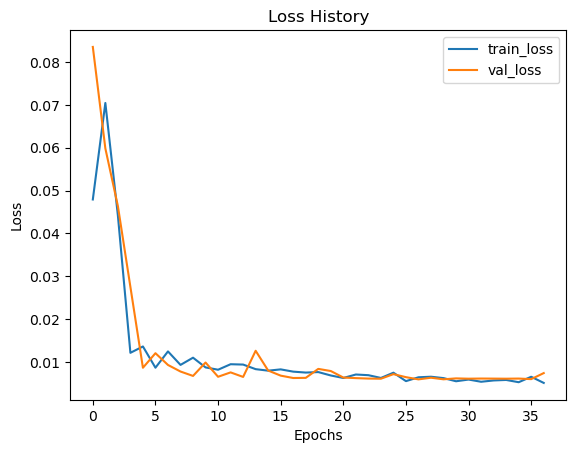

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

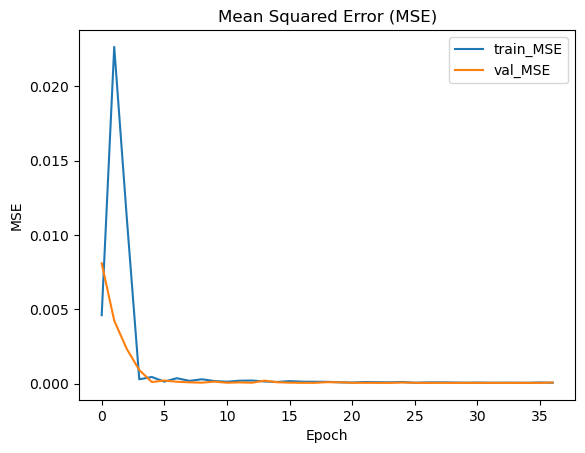

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

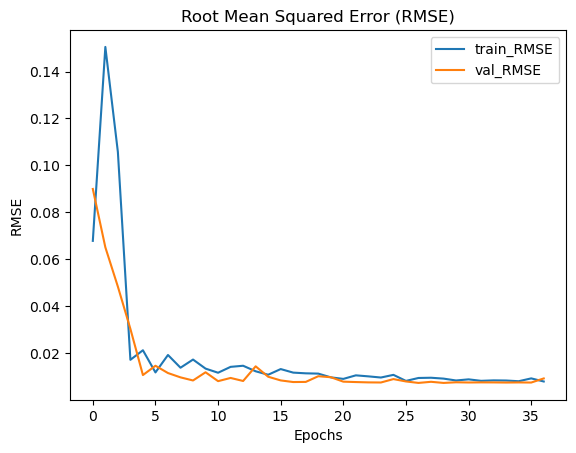

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

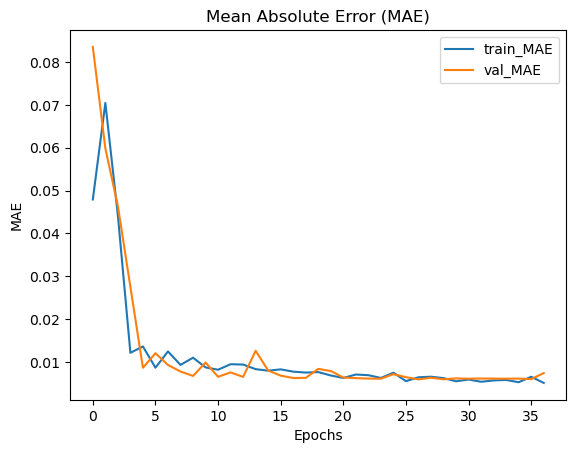

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

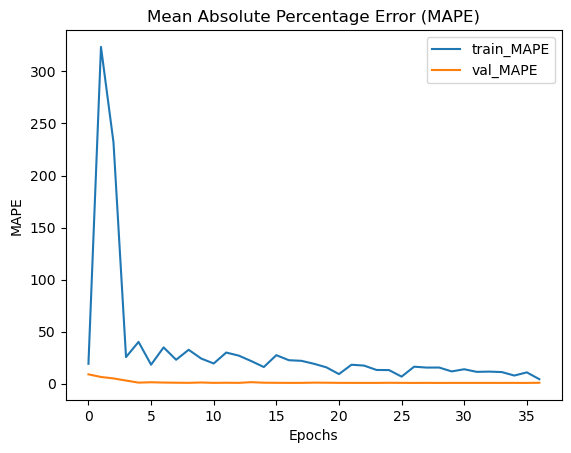

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 18:45:30.702939: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 1)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


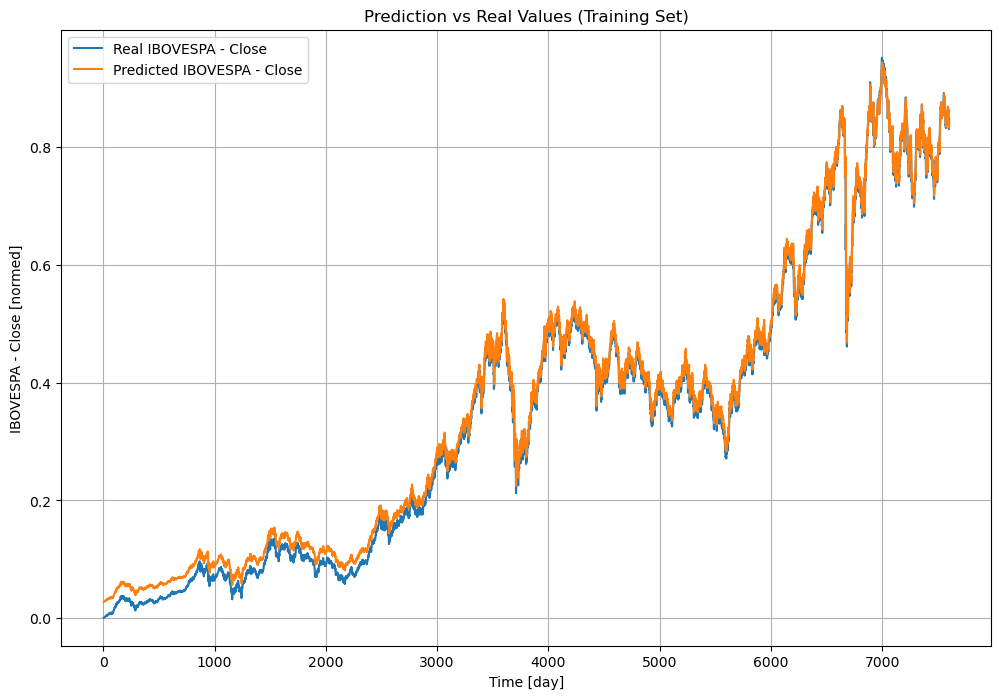

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 1)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


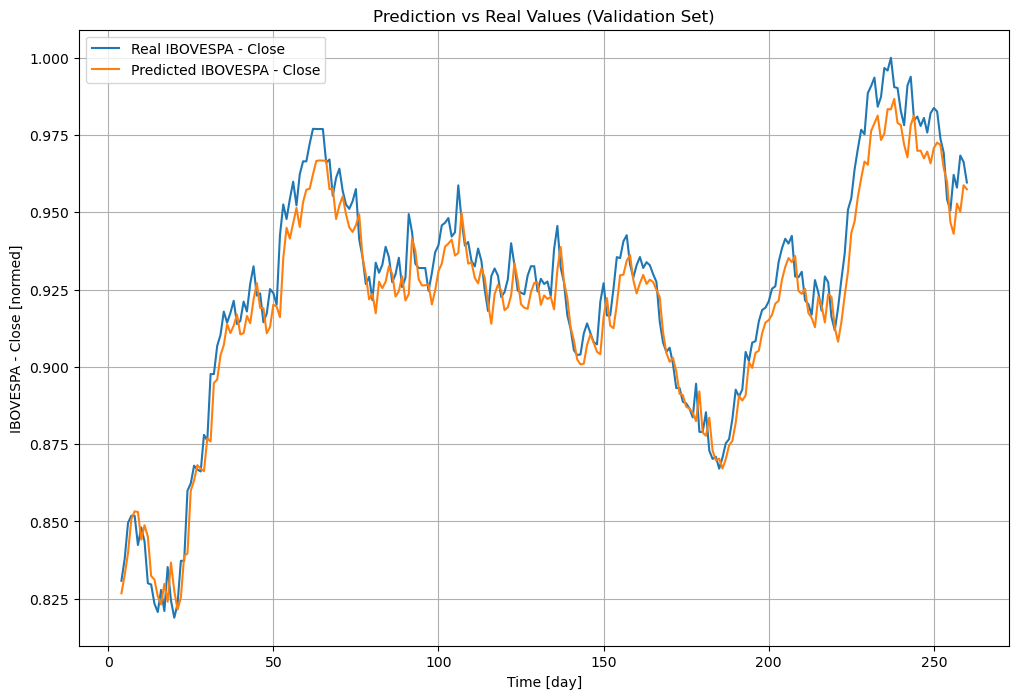

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 1)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


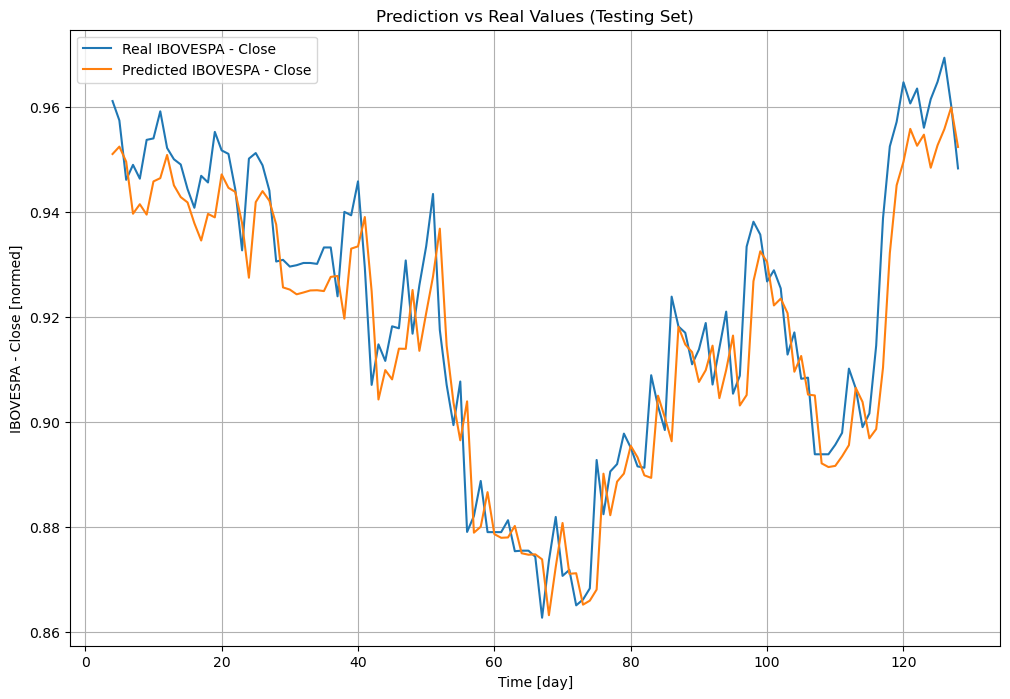

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

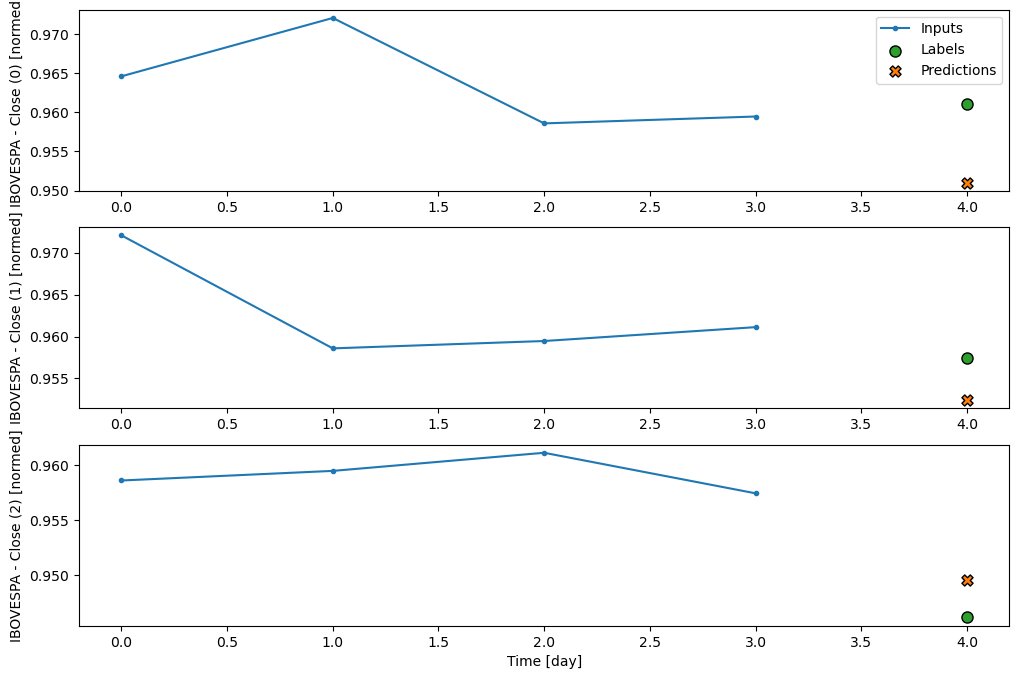

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:11s:917ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[[0.9510215 , 0.9510215 , 0.9510215 , ..., 0.9510215 ,
         0.9510215 , 0.9510215 ]],

       [[0.95243055, 0.95243055, 0.95243055, ..., 0.95243055,
         0.95243055, 0.95243055]],

       [[0.94956434, 0.94956434, 0.94956434, ..., 0.94956434,
         0.94956434, 0.94956434]],

       ...,

       [[0.9557714 , 0.9557714 , 0.9557714 , ..., 0.9557714 ,
         0.9557714 , 0.9557714 ]],

       [[0.9599207 , 0.9599207 , 0.9599207 , ..., 0.9599207 ,
         0.9599207 , 0.9599207 ]],

       [[0.9523666 , 0.9523666 , 0.9523666 , ..., 0.9523666 ,
         0.9523666 , 0.9523666 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')